In [479]:
#import packages 

import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import numpy as np
from scipy.stats import linregress
import netCDF4

import xarray as xr


In [517]:
ds = pd.read_excel('Copy of Redo CM Atlantic Bulk Sediment Workup.xlsx', sheet_name = 'CM workup')

df = pd.read_excel('ziverisedsworkupCMbatch2.xlsx', sheet_name = 'CM workup batch2')

dt = pd.read_excel('ziverisedsworkupCMbatch2.xlsx', sheet_name = 'complied batch 1 and 2 CM ')

dr = pd.read_excel('Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'foram_cocco_workup')

dp = pd.read_excel('Copy of Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'omegac_workup', header =1)

ps = pd.read_excel('Copy of Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'phophate and silicate')

ds20 = xr.open_dataset('woa23_decav_t00_01-Copy1.nc', decode_times = False)

d1 = pd.read_excel('Copy of Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'station 1 ODV')
d3 = pd.read_excel('Copy of Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'station 3 ODV temps')
d4 = pd.read_excel('Copy of Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'station 4 ODV temps')
d6 = pd.read_excel('Copy of Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'station 6 ODV temps')
d8 = pd.read_excel('Copy of Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'station 8 ODV temps')
d9 = pd.read_excel('Copy of Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'station 9 ODV temps')
d10 = pd.read_excel('Copy of Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'station 10 ODV temps')
d11 = pd.read_excel('Copy of Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'station 11 ODV temps')
d12 = pd.read_excel('Copy of Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'station 12 ODV temps')
d16 = pd.read_excel('Copy of Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'station 16 ODV temps')
d16_2 = pd.read_excel('Copy of Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'station 16.2 ODV temps')
d18 = pd.read_excel('Copy of Copy of WORKUP FOR ALL ATL SIEVED SEDIMENTS.xlsx', sheet_name = 'station 18 ODV temps')



In [249]:
#### indexing variables

ic1 = ds['%IC']
ic2 = df['%IC']

tc1 = ds['%TC']
tc2 = df['%TC']

toc1 = ds['fixed %TOC'].dropna()
toc2 = df['TOC% fixed'].dropna()

toc_tc1 = (toc1/tc1).dropna()
toc_tc2 = (toc2/tc2).dropna()

d13c_1 = ds['          Delta CRDS'].dropna()
d13c_2 = df['          Delta CRDS'].dropna()

d13c_1 = d13c_1[0:12]
d13c_2 = d13c_2[0:12]

d13c_avg = dt['d13c']
tc_avg = dt['TC%']
toc_avg = dt['TOC%']
toc_tc_avg = (toc_avg/tc_avg)

z = dr['depth ']

s = dt['sample']

lat = dp['Lat']
lon = dp['Lon']

t20 = ds20['t_an']

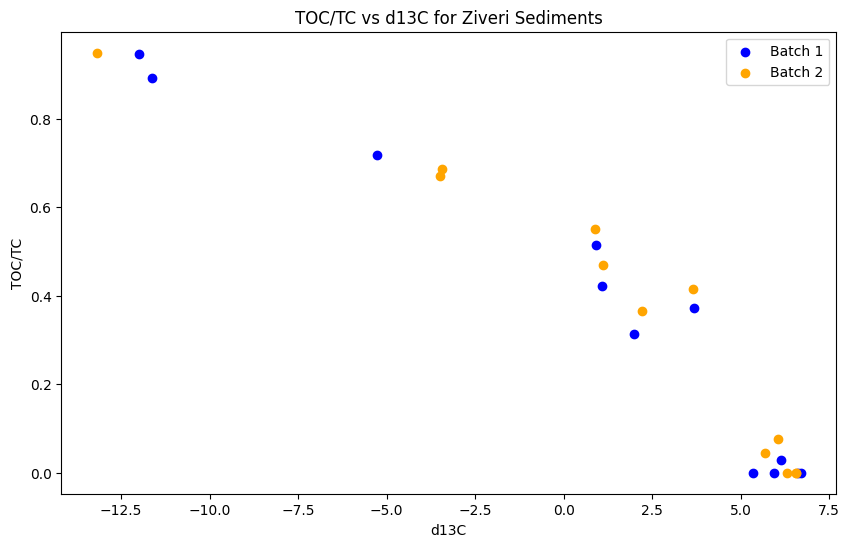

In [251]:
plt.figure(figsize=(10,6))

plt.scatter(d13c_1,toc_tc1, color = 'b', label = 'Batch 1')
plt.scatter(d13c_2,toc_tc2, color = 'orange', label = 'Batch 2')
plt.xlabel('d13C')
plt.ylabel('TOC/TC')
plt.title('TOC/TC vs d13C for Ziveri Sediments')
plt.legend()

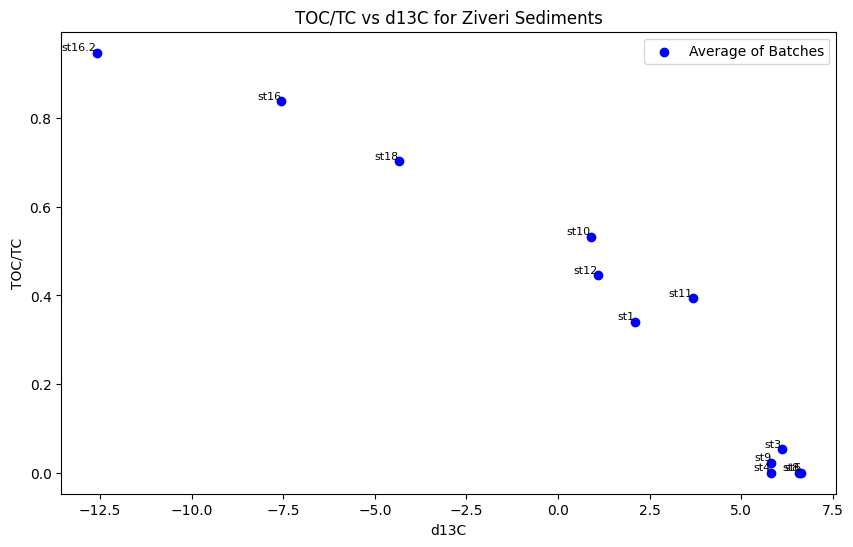

In [253]:

plt.figure(figsize=(10,6))

plt.scatter(d13c_avg,toc_tc_avg, color = 'b', label = 'Average of Batches')

plt.xlabel('d13C')
plt.ylabel('TOC/TC')
plt.title('TOC/TC vs d13C for Ziveri Sediments')
plt.legend()

for x, y, label in zip(d13c_avg, toc_tc_avg, s):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')

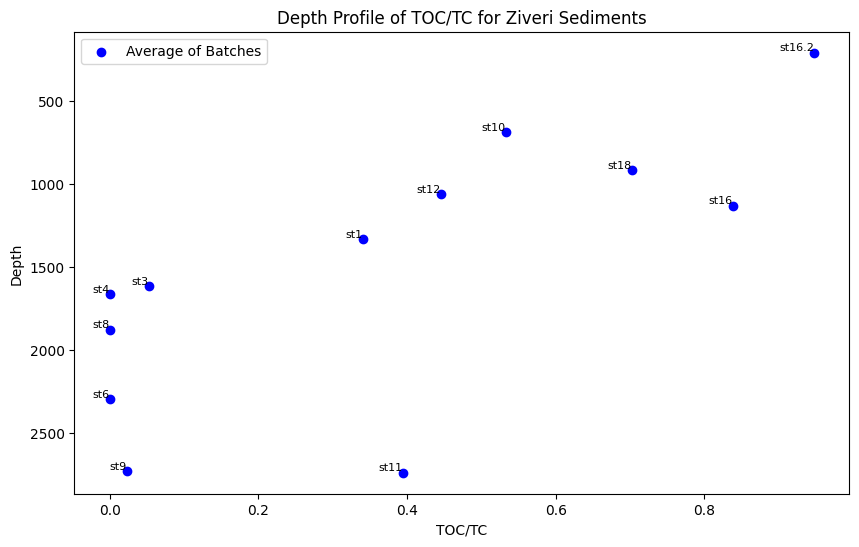

In [254]:
plt.figure(figsize=(10,6))

plt.scatter(toc_tc_avg, z, color = 'b', label = 'Average of Batches')

plt.xlabel('TOC/TC')
plt.ylabel('Depth')
plt.title('Depth Profile of TOC/TC for Ziveri Sediments')
plt.legend()
plt.gca().invert_yaxis()
for x, y, label in zip( toc_tc_avg,z, s):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')

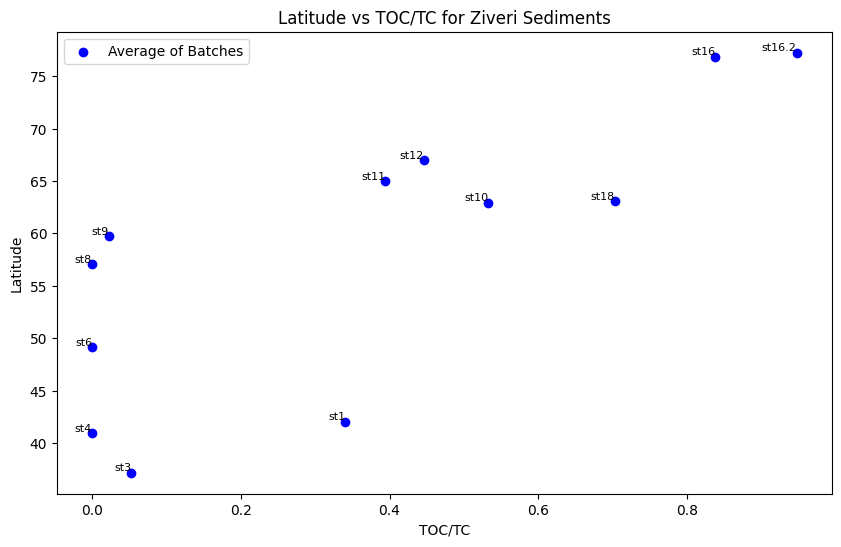

In [255]:
plt.figure(figsize=(10,6))

plt.scatter(toc_tc_avg, lat, color = 'b', label = 'Average of Batches')

plt.xlabel('TOC/TC')
plt.ylabel('Latitude')
plt.title('Latitude vs TOC/TC for Ziveri Sediments')
plt.legend()

for x, y, label in zip( toc_tc_avg,lat, s):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')

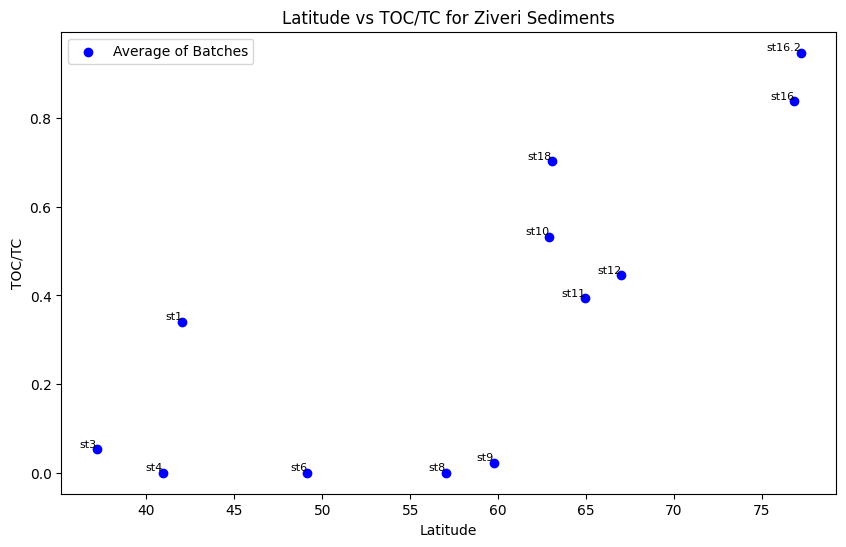

In [258]:
plt.figure(figsize=(10,6))

plt.scatter(lat, toc_tc_avg, color = 'b', label = 'Average of Batches')

plt.ylabel('TOC/TC')
plt.xlabel('Latitude')
plt.title('Latitude vs TOC/TC for Ziveri Sediments')
plt.legend()

for x, y, label in zip( lat, toc_tc_avg, s):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')

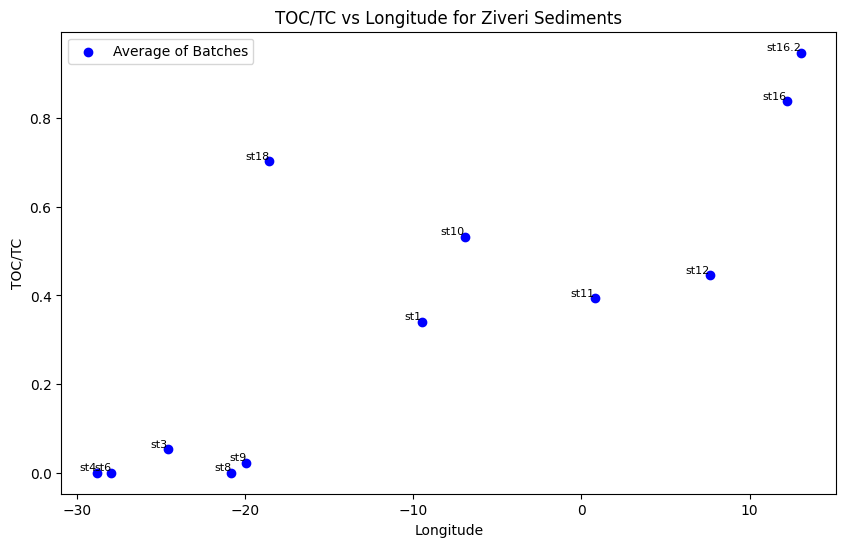

In [261]:
plt.figure(figsize=(10,6))

plt.scatter(lon, toc_tc_avg, color = 'b', label = 'Average of Batches')

plt.ylabel('TOC/TC')
plt.xlabel('Longitude')
plt.title('TOC/TC vs Longitude for Ziveri Sediments')
plt.legend()

for x, y, label in zip(lon, toc_tc_avg, s):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')

350.50565


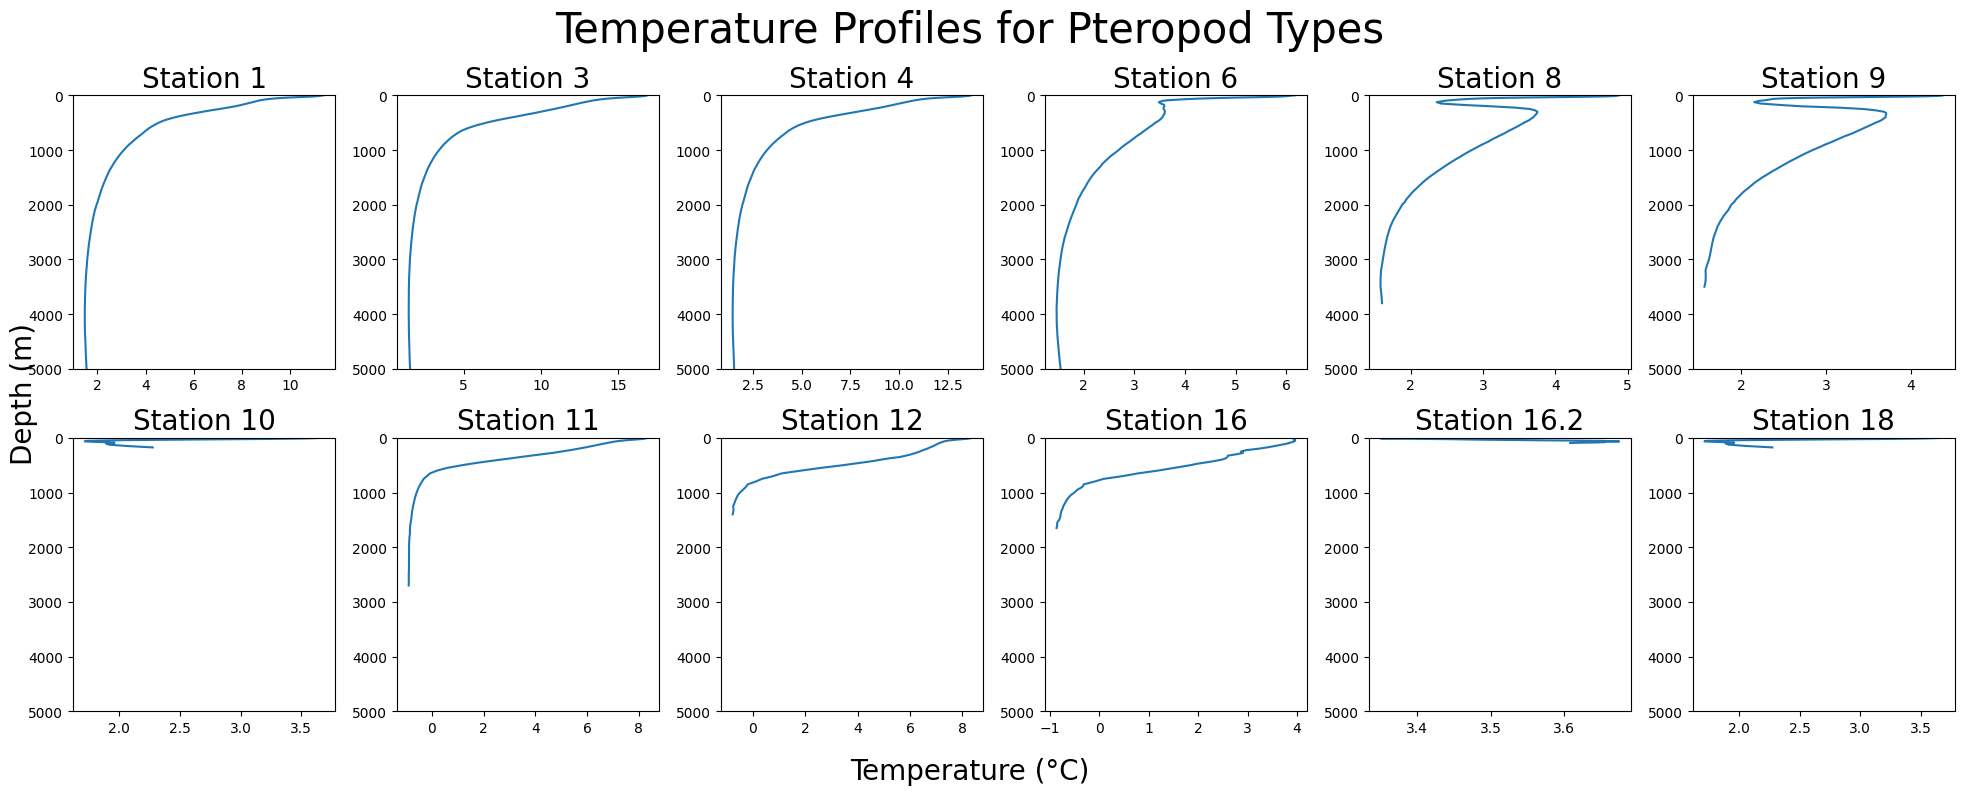

In [421]:
#graph 1: T profiles at all pteropod locations

#select data for correct lat/lons 
#WOA data needs to be in 360 degrees
lon10 = -9.49435
lon36010 = ( lon10 + 360) % 360
print(lon36010)
#62.92333333, 63.05391667,
t1 = t20.sel(lat=42.02293333, lon=350.50565, method='nearest')  
t3 = t20.sel(lat=37.15655, lon=335.4079333, method='nearest')
t4 = t20.sel(lat=40.93448333, lon=331.16065, method='nearest')
t6 = t20.sel(lat=49.14403333, lon=332.0476667, method='nearest')
t8 = t20.sel(lat=57.03328333, lon=339.176, method='nearest')
t9 = t20.sel(lat=59.75353333, lon=340.0784667, method='nearest')

t10 = t20.sel(lat=61.9, lon=353.060566667, method='nearest')
t11 = t20.sel(lat=64.95403333, lon=0.7932332999999971, method='nearest') 
t12 = t20.sel(lat=67.0063, lon=7.649933332999979, method='nearest') 

t16 = t20.sel(lat=76.8567, lon=12.19844999999998, method='nearest')
t16_2 = t20.sel(lat=77.233, lon=13.0616, method='nearest')

t18 = t20.sel(lat=61.9, lon=341.44353333, method='nearest')


#index depths and flatten data
z1 = t1['depth']
t1 = t1.values.flatten()


z3 = t3['depth']
t3 = t3.values.flatten()

z4 = t4['depth']
t4 = t4.values.flatten()

z6 = t6['depth']
t6 = t6.values.flatten()

z8 = t8['depth']
t8 = t8.values.flatten()

z9 = t9['depth']
t9 = t9.values.flatten()

z10 = t10['depth']
t10 = t10.values.flatten()

z11 = t11['depth']
t11 = t11.values.flatten()

z12 = t12['depth']
t12 = t12.values.flatten()

z16 = t16['depth']
t16 = t16.values.flatten()

z16_2 = t16_2['depth']
t16_2 = t16_2.values.flatten()

z18 = t18['depth']
t18 = t18.values.flatten()

# for z10, val in zip(z10, t10):
#     print(f"Depth: {z10.values} m → Temp: {val:.2f} °C")


fig,axes = plt.subplots(2,6, figsize=(20,8))

axes[0,0].plot(t1,z1)

axes[0,1].plot(t3, z3)

axes[0,2].plot(t4, z4)

axes[0,3].plot(t6, z6)

axes[0,4].plot(t8, z8)

axes[0,5].plot(t9, z9)

axes[1,0].plot(t10, z10)

axes[1,1].plot(t11, z11)

axes[1,2].plot(t12, z12)

axes[1,3].plot(t16, z16)

axes[1,4].plot(t16_2, z16_2)

axes[1,5].plot(t18, z18)

axes[0,0].set_ylim(0,5000)
axes[0,1].set_ylim(0,5000)
axes[0,2].set_ylim(0,5000)
axes[0,3].set_ylim(0,5000)
axes[0,4].set_ylim(0,5000)
axes[0,5].set_ylim(0,5000)
axes[1,0].set_ylim(0,5000)
axes[1,1].set_ylim(0,5000)
axes[1,2].set_ylim(0,5000)
axes[1,3].set_ylim(0,5000)
axes[1,4].set_ylim(0,5000)
axes[1,5].set_ylim(0,5000)

axes[0,0].invert_yaxis()
axes[0,1].invert_yaxis()
axes[0,2].invert_yaxis()
axes[0,3].invert_yaxis()
axes[0,4].invert_yaxis()
axes[0,5].invert_yaxis()
axes[1,0].invert_yaxis()
axes[1,1].invert_yaxis()
axes[1,2].invert_yaxis()
axes[1,3].invert_yaxis()
axes[1,4].invert_yaxis()
axes[1,5].invert_yaxis()

fig.supxlabel("Temperature (°C)", fontsize =20)
fig.supylabel("Depth (m)", fontsize =20)
fig.suptitle('Temperature Profiles for Pteropod Types', fontsize = 30)

axes[0,0].set_title("Station 1", fontsize =20)

axes[0,1].set_title("Station 3", fontsize =20)

axes[0,2].set_title("Station 4", fontsize =20)

axes[0,3].set_title("Station 6", fontsize =20)

axes[0,4].set_title("Station 8", fontsize =20)

axes[0,5].set_title("Station 9", fontsize =20)

axes[1,0].set_title("Station 10", fontsize =20)

axes[1,1].set_title("Station 11", fontsize =20)

axes[1,2].set_title("Station 12", fontsize =20)

axes[1,3].set_title("Station 16", fontsize =20)

axes[1,4].set_title("Station 16.2", fontsize =20)

axes[1,5].set_title("Station 18", fontsize =20)

fig.tight_layout()

plt.show()

In [390]:
def nearest_wet_profile(da, lat, lon, max_steps=6):
    # da is t20 (lat, lon, depth)
    lat_idx = int(np.argmin(np.abs(da.lat.values - lat)))
    lon_idx = int(np.argmin(np.abs(da.lon.values - lon)))

    best = None
    best_finite = -1

    for step in range(max_steps + 1):
        for i in range(lat_idx - step, lat_idx + step + 1):
            if i < 0 or i >= da.lat.size: 
                continue
            for j in range(lon_idx - step, lon_idx + step + 1):
                if j < 0 or j >= da.lon.size: 
                    continue

                prof = da.isel(lat=i, lon=j)  # (depth)
                vals = prof.values.squeeze()
                finite = np.isfinite(vals).sum()

                if finite > best_finite:
                    best = prof
                    best_finite = finite

        if best_finite > 0:  # found a wet-ish cell
            break

    return best

t10_da = nearest_wet_profile(t20, 62.92333333, 353.060566667)
t18_da = nearest_wet_profile(t20, 63.05391667, 341.44353333)

# then use these for plotting:
z10 = t10_da['depth']; t10 = t10_da.values.flatten()
z18 = t18_da['depth']; t18 = t18_da.values.flatten()

print("t10 chosen lat/lon:", float(t10_da.lat.values), float(t10_da.lon.values))
print("t18 chosen lat/lon:", float(t18_da.lat.values), float(t18_da.lon.values))


t10 chosen lat/lon: 61.5 178.5
t18 chosen lat/lon: 61.5 177.5


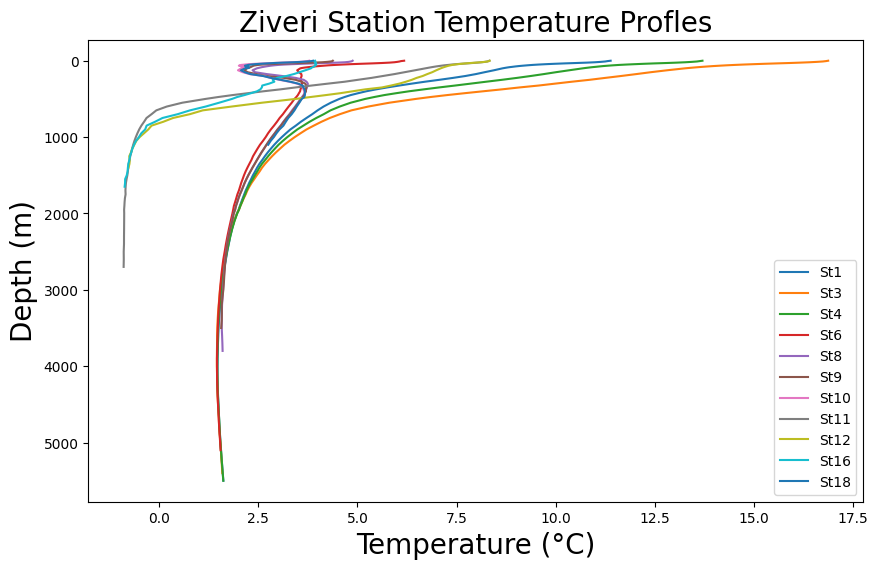

In [392]:
#graph 1: T profiles at all locations


plt.figure (figsize = (10,6))

plt.plot(t1, z1, label ='St1')

plt.plot(t3, z3, label ='St3')

plt.plot(t4, z4, label ='St4')

plt.plot(t6, z6, label ='St6')

plt.plot(t8, z8, label ='St8')

plt.plot(t9, z9, label ='St9')

plt.plot(t10, z10, label ='St10')

plt.plot(t11, z11, label ='St11')

plt.plot(t12, z12, label ='St12')

plt.plot(t16, z16, label ='St16')

#plt.plot(t16_2, z16_2, label ='St16.2')

plt.plot(t18, z18, label ='St18')

plt.gca().invert_yaxis()

plt.legend() 
plt.xlabel("Temperature (°C)", fontsize =20)
plt.ylabel("Depth (m)", fontsize =20)
plt.title("Ziveri Station Temperature Profles", fontsize =20)

plt.show()

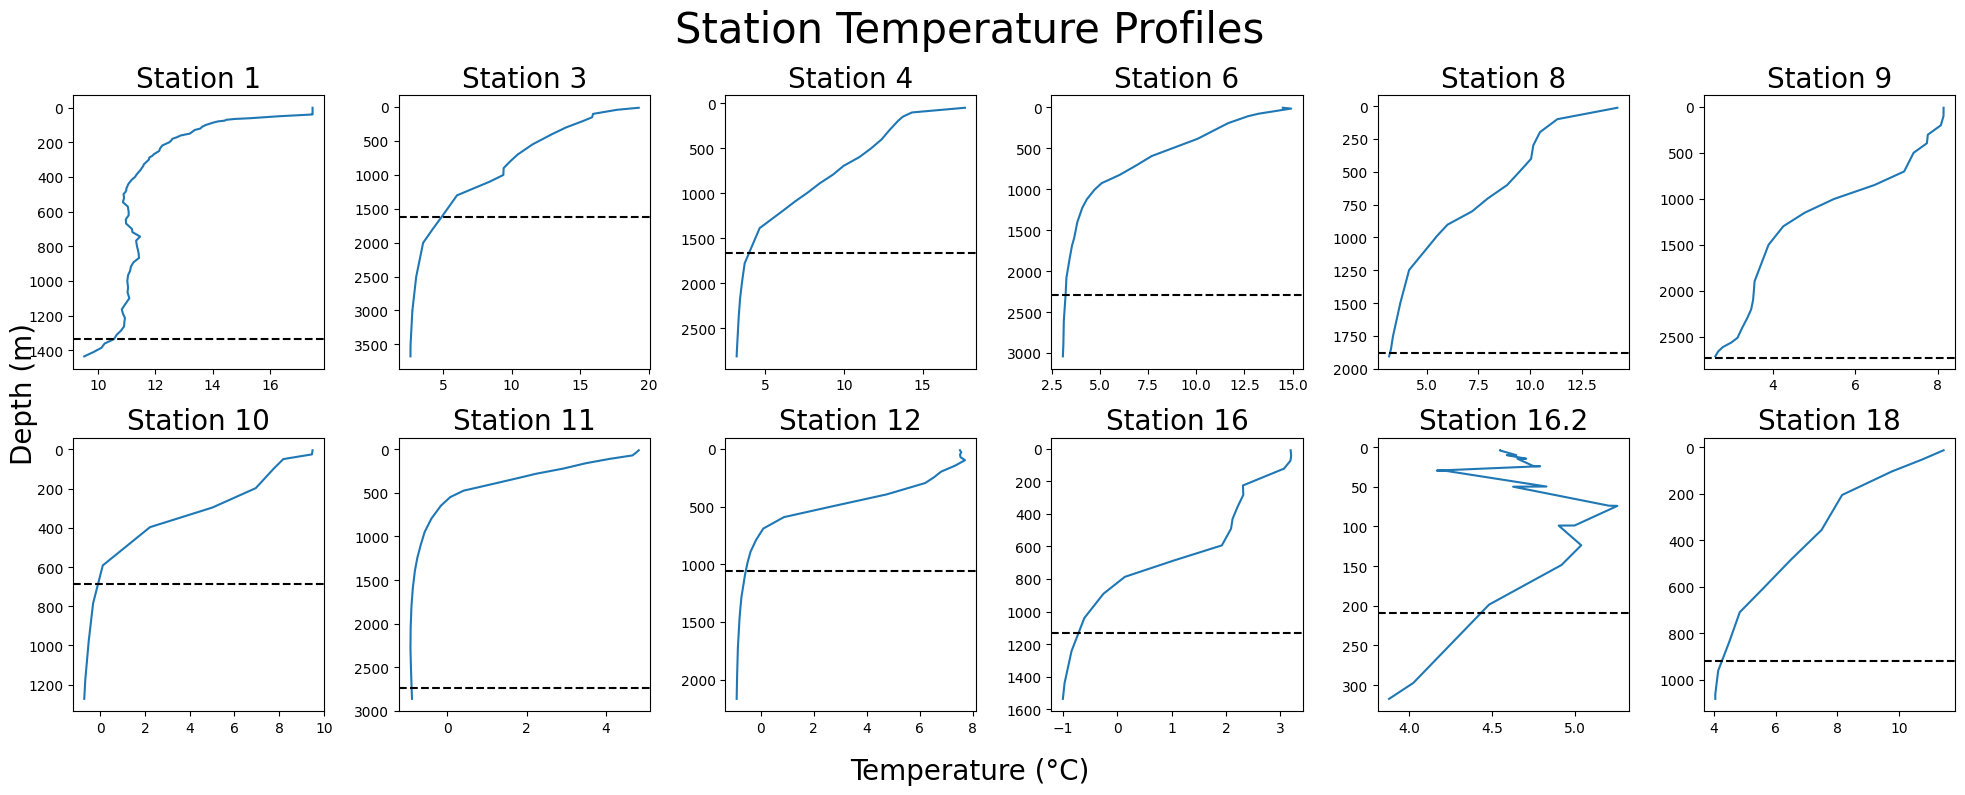

In [394]:
#graph: odv and woa temps for stations 

#select data for correct lat/lons 
#WOA data needs to be in 360 degrees
tt1 = d1['TEMPERATURE [DEG C]']
tt3 = d3['TEMPERATURE [DEG C]']
tt4 = d4['TEMPERATURE [DEG C]']
tt6 = d6['TEMPERATURE [DEG C]']
tt8 = d8['TEMPERATURE [DEG C]']
tt9 = d9['TEMPERATURE [DEG C]']
tt10 = d10['TEMPERATURE [DEG C]']
tt11 = d11['TEMPERATURE [DEG C]']
tt12 = d12['TEMPERATURE [DEG C]']
tt16 = d16['TEMPERATURE [DEG C]']

tt16_2 = d16_2['TEMPERATURE [DEG C]']

tt18 = d18['TEMPERATURE [DEG C]']


#index depths and flatten data
zz1 = d1['DEPTH [M]']

zz3 = d3['DEPTH [M]']


zz4 = d4['DEPTH [M]']


zz6 = d6['DEPTH [M]']


zz8 = d8['DEPTH [M]']


zz9 = d9['DEPTH [M]']


zz10 = d10['DEPTH [M]']


zz11 = d11['DEPTH [M]']


zz12 = d12['DEPTH [M]']


zz16 = d16['DEPTH [M]']


zz16_2 = d16_2['DEPTH [M]']

zz18 = d18['DEPTH [M]']




fig,axes = plt.subplots(2,6, figsize=(20,8))

axes[0,0].plot(tt1, zz1)

axes[0,1].plot(tt3, zz3)

axes[0,2].plot(tt4, zz4)

axes[0,3].plot(tt6, zz6)

axes[0,4].plot(tt8, zz8)

axes[0,5].plot(tt9, zz9)

axes[1,0].plot(tt10, zz10)

axes[1,1].plot(tt11, zz11)

axes[1,2].plot(tt12, zz12)

axes[1,3].plot(tt16, zz16)

axes[1,4].plot(tt16_2, zz16_2)

axes[1,5].plot(tt18, zz18)

axes[0,0].invert_yaxis()
axes[0,1].invert_yaxis()
axes[0,2].invert_yaxis()
axes[0,3].invert_yaxis()
axes[0,4].invert_yaxis()
axes[0,5].invert_yaxis()
axes[1,0].invert_yaxis()
axes[1,1].invert_yaxis()
axes[1,2].invert_yaxis()
axes[1,3].invert_yaxis()
axes[1,4].invert_yaxis()
axes[1,5].invert_yaxis()

fig.supxlabel("Temperature (°C)", fontsize =20)
fig.supylabel("Depth (m)", fontsize =20)
fig.suptitle('Station Temperature Profiles', fontsize = 30)

axes[0,0].set_title("Station 1", fontsize =20)

axes[0,1].set_title("Station 3", fontsize =20)

axes[0,2].set_title("Station 4", fontsize =20)

axes[0,3].set_title("Station 6", fontsize =20)

axes[0,4].set_title("Station 8", fontsize =20)

axes[0,5].set_title("Station 9", fontsize =20)

axes[1,0].set_title("Station 10", fontsize =20)

axes[1,1].set_title("Station 11", fontsize =20)

axes[1,2].set_title("Station 12", fontsize =20)

axes[1,3].set_title("Station 16", fontsize =20)

axes[1,4].set_title("Station 16.2", fontsize =20)

axes[1,5].set_title("Station 18", fontsize =20)

axes[0,0].axhline(y=1333, color = 'Black', linestyle= '--')

axes[0,1].axhline(y=1616, color = 'Black', linestyle= '--')

axes[0,2].axhline(y=1664, color = 'Black', linestyle= '--')

axes[0,3].axhline(y=2296, color = 'Black', linestyle= '--')

axes[0,4].axhline(y=1877, color = 'Black', linestyle= '--')

axes[0,5].axhline(y=2730, color = 'Black', linestyle= '--')

axes[1,0].axhline(y=688, color = 'Black', linestyle= '--')

axes[1,1].axhline(y=2740, color = 'Black', linestyle= '--')

axes[1,2].axhline(y=1060, color = 'Black', linestyle= '--')

axes[1,3].axhline(y=1132, color = 'Black', linestyle= '--')

axes[1,4].axhline(y=209, color = 'Black', linestyle= '--')

axes[1,5].axhline(y=918, color = 'Black', linestyle= '--')


fig.tight_layout()

plt.show()

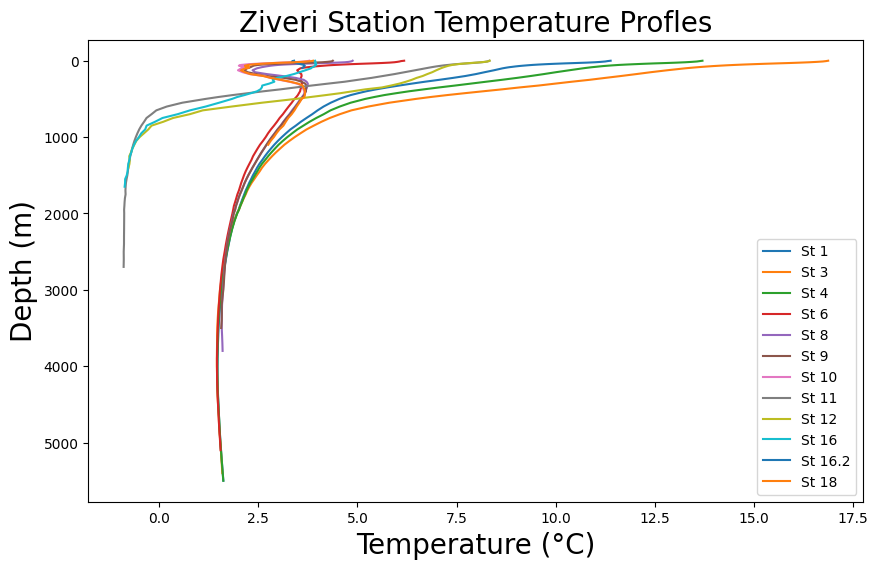

In [396]:



plt.figure (figsize = (10,6))

plt.plot(t1, z1, label ='St 1')

plt.plot(t3, z3, label ='St 3')

plt.plot(t4, z4, label ='St 4')

plt.plot(t6, z6, label ='St 6')

plt.plot(t8, z8, label ='St 8')


plt.plot(t9, z9, label ='St 9')

plt.plot(t10, z10, label ='St 10')

plt.plot(t11, z11, label ='St 11')

plt.plot(t12, z12, label ='St 12')

plt.plot(t16, z16, label ='St 16')

plt.plot(t16_2, z16_2, label ='St 16.2')


plt.plot(t18, z18, label ='St 18')

plt.gca().invert_yaxis()

plt.legend() 
plt.xlabel("Temperature (°C)", fontsize =20)
plt.ylabel("Depth (m)", fontsize =20)
plt.title("Ziveri Station Temperature Profles", fontsize =20)

plt.show()

Index(['station', 'depth ', 'Lat', 'Lon', 'LON', 'LONN', 'lon', 'lat',
       'depth .1', 'omega C at depth', 'omegac at surface', 'temp at surface',
       'temp at depth '],
      dtype='object')


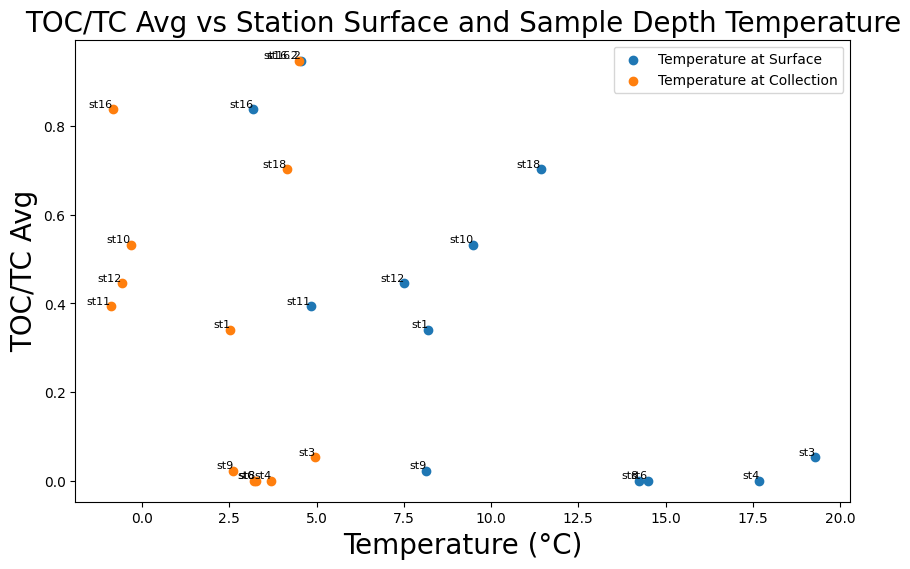

In [398]:

plt.figure (figsize = (10,6))
print(dp.columns)
ts = dp['temp at surface']
td = dp['temp at depth ']

plt.scatter(ts, toc_tc_avg, label ='Temperature at Surface')
plt.scatter(td, toc_tc_avg, label ='Temperature at Collection')





plt.legend(loc = 'upper right') 
plt.xlabel("Temperature (°C)", fontsize =20)
plt.ylabel("TOC/TC Avg", fontsize =20)
plt.title("TOC/TC Avg vs Station Surface and Sample Depth Temperature", fontsize =20)

for x, y, label in zip(ts, toc_tc_avg, s):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')
for x, y, label in zip(td, toc_tc_avg, s):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')

plt.show()

Index(['station', 'depth ', 'Lat', 'Lon', 'LON', 'LONN', 'lon', 'lat',
       'depth .1', 'omega C at depth', 'omegac at surface', 'temp at surface',
       'temp at depth '],
      dtype='object')


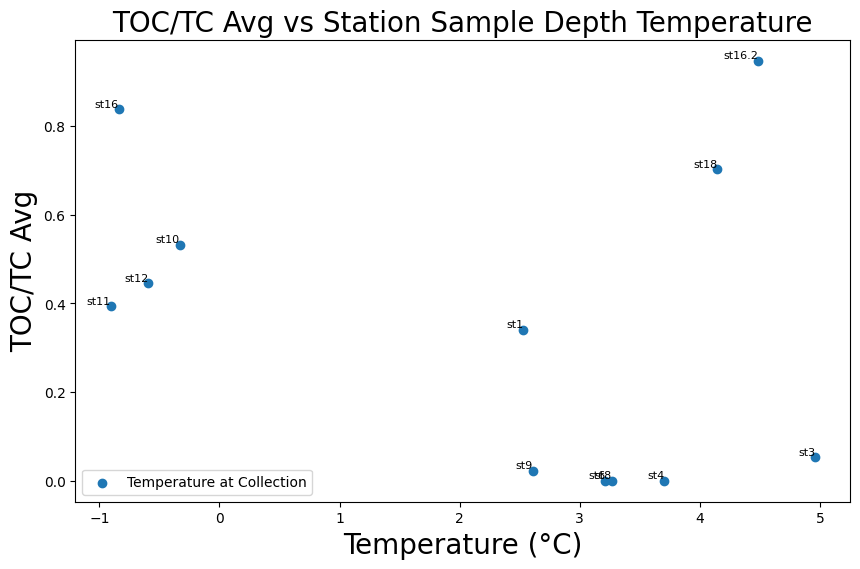

In [400]:


plt.figure (figsize = (10,6))
print(dp.columns)
ts = dp['temp at surface']
td = dp['temp at depth ']


plt.scatter(td, toc_tc_avg, label ='Temperature at Collection')




plt.legend(loc = 'lower left') 
plt.xlabel("Temperature (°C)", fontsize =20)
plt.ylabel("TOC/TC Avg", fontsize =20)
plt.title("TOC/TC Avg vs Station Sample Depth Temperature", fontsize =20)


for x, y, label in zip(td, toc_tc_avg, s):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')

plt.show()

Index(['station', 'depth ', 'Lat', 'Lon', 'LON', 'LONN', 'lon', 'lat',
       'depth .1', 'omega C at depth', 'omegac at surface', 'temp at surface',
       'temp at depth '],
      dtype='object')


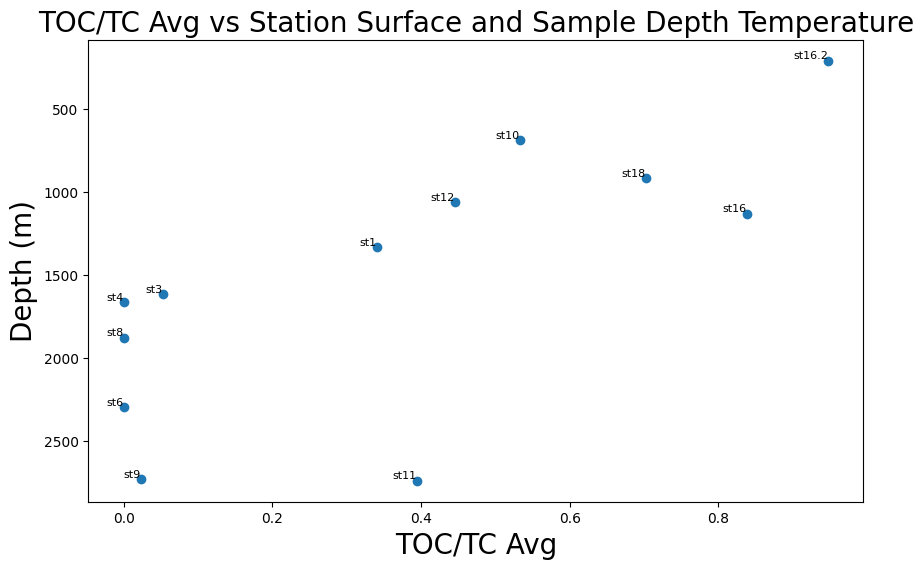

In [402]:


plt.figure (figsize = (10,6))
print(dp.columns)
z = dp['depth ']
plt.scatter(toc_tc_avg, z, label ='Temperature at Surface')



plt.gca().invert_yaxis()


plt.ylabel("Depth (m)", fontsize =20)
plt.xlabel("TOC/TC Avg", fontsize =20)
plt.title("TOC/TC Avg vs Station Surface and Sample Depth Temperature", fontsize =20)

for x, y, label in zip(toc_tc_avg,z, s):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')

plt.show()

In [404]:
#indexing omega C
o1 = d1['Omega~_C(P,T,ALK,DIC)']
zo1 = d1['DEPTH [M].1']
o3 = d3['Omega~_C(P,T,ALK,DIC)']
zo3 = d3['DEPTH [M].1']
o4 = d4['Omega~_C(P,T,ALK,DIC)']
zo4 = d4['DEPTH [M].1']
o6 = d6['Omega~_C(P,T,ALK,DIC)']
zo6 = d6['DEPTH [M].1']
o8 = d8['Omega~_C(P,T,ALK,DIC)']
zo8 = d8['DEPTH [M].1']
o9 = d9['Omega~_C(P,T,ALK,DIC)']
zo9 = d9['DEPTH [M].1']
o10 = d10['Omega~_C(P,T,ALK,DIC)']
zo10 = d10['DEPTH [M].1']
o11 = d11['Omega~_C(P,T,ALK,DIC)']
zo11 = d11['DEPTH [M].1']
o12 = d12['Omega~_C(P,T,ALK,DIC)']
zo12 = d12['DEPTH [M].1']
o16 = d16['Omega~_C(P,T,ALK,DIC)']
zo16 = d16['DEPTH [M].1']
o16_2 = d16_2['Omega~_C(P,T,ALK,DIC)']
zo16_2 = d16_2['DEPTH [M].1']
o18 = d18['Omega~_C(P,T,ALK,DIC)']
zo18 = d18['DEPTH [M].1']

#indexing omega A

a1 = d1['Omega~_A(P,T,ALK,DIC)']
za1 = d1['DEPTH [M].2']
a3 = d3['Omega~_A(P,T,ALK,DIC)']
za3 = d3['DEPTH [M].2']
a4 = d4['Omega~_A(P,T,ALK,DIC)']
za4 = d4['DEPTH [M].2']
a6 = d6['Omega~_A(P,T,ALK,DIC)']
za6 = d6['DEPTH [M].2']
a8 = d8['Omega~_A(P,T,ALK,DIC)']
za8 = d8['DEPTH [M].2']
a9 = d9['Omega~_A(P,T,ALK,DIC)']
za9 = d9['DEPTH [M].2']
a10 = d10['Omega~_A(P,T,ALK,DIC)']
za10 = d10['DEPTH [M].2']
a11 = d11['Omega~_A(P,T,ALK,DIC)']
za11 = d11['DEPTH [M].2']
a12 = d12['Omega~_A(P,T,ALK,DIC)']
za12 = d12['DEPTH [M].2']
a16 = d16['Omega~_A(P,T,ALK,DIC)']
za16 = d16['DEPTH [M].2']
a16_2 = d16_2['Omega~_A(P,T,ALK,DIC)']
za16_2 = d16_2['DEPTH [M].2']
a18 = d18['Omega~_A(P,T,ALK,DIC)']
za18 = d18['DEPTH [M].2']

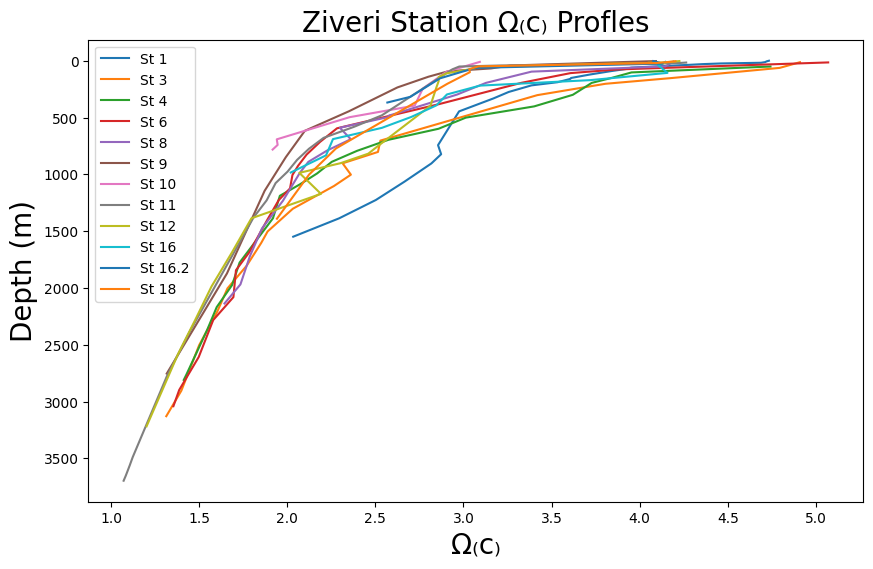

In [406]:
#graph of odv omegac vs depths for stations

plt.figure (figsize = (10,6))

plt.plot(o1, zo1, label ='St 1')

plt.plot(o3, zo3, label ='St 3')

plt.plot(o4, zo4, label ='St 4')

plt.plot(o6, zo6, label ='St 6')

plt.plot(o8, zo8, label ='St 8')

plt.plot(o9, zo9, label ='St 9')

plt.plot(o10, zo10, label ='St 10')

plt.plot(o11, zo11, label ='St 11')

plt.plot(o12, zo12, label ='St 12')

plt.plot(o16, zo16, label ='St 16')

plt.plot(o16_2, zo16_2, label ='St 16.2')

plt.plot(o18, zo18, label ='St 18')

plt.gca().invert_yaxis()

plt.legend() 
plt.xlabel("\u03A9\u208Dc\u208E", fontsize =20)
plt.ylabel("Depth (m)", fontsize =20)
plt.title("Ziveri Station \u03A9\u208Dc\u208E Profles", fontsize =20)

plt.show()

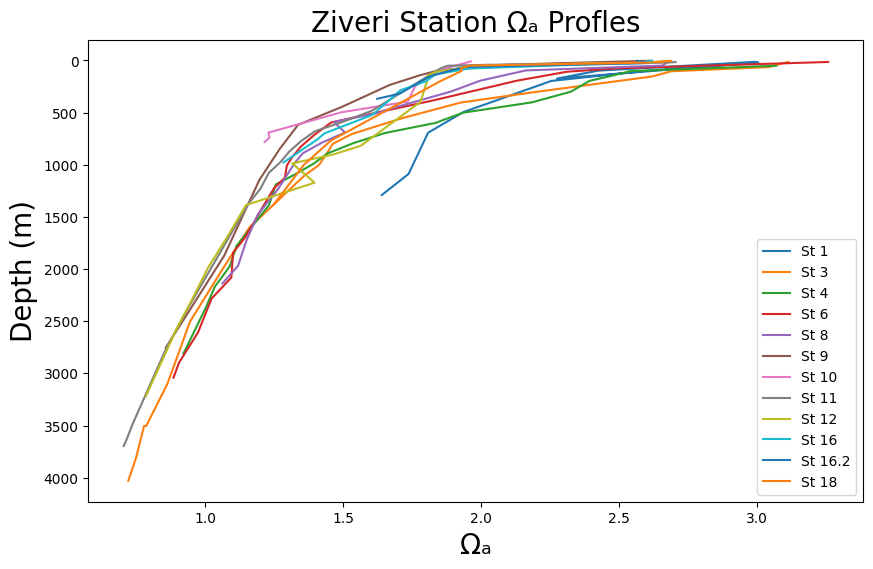

In [408]:

#graph of odv omega a vs depths for stations

plt.figure (figsize = (10,6))

plt.plot(a1, za1, label ='St 1')

plt.plot(a3, za3, label ='St 3')

plt.plot(a4, za4, label ='St 4')

plt.plot(a6, za6, label ='St 6')

plt.plot(a8, za8, label ='St 8')

plt.plot(a9, za9, label ='St 9')

plt.plot(a10, za10, label ='St 10')

plt.plot(a11, za11, label ='St 11')

plt.plot(a12, za12, label ='St 12')

plt.plot(a16, za16, label ='St 16')

plt.plot(a16_2, za16_2, label ='St 16.2')

plt.plot(a18, za18, label ='St 18')

plt.gca().invert_yaxis()

plt.legend() 
plt.xlabel("\u03A9\u2090", fontsize =20)
plt.ylabel("Depth (m)", fontsize =20)
plt.title("Ziveri Station \u03A9\u2090 Profles", fontsize =20)

plt.show()

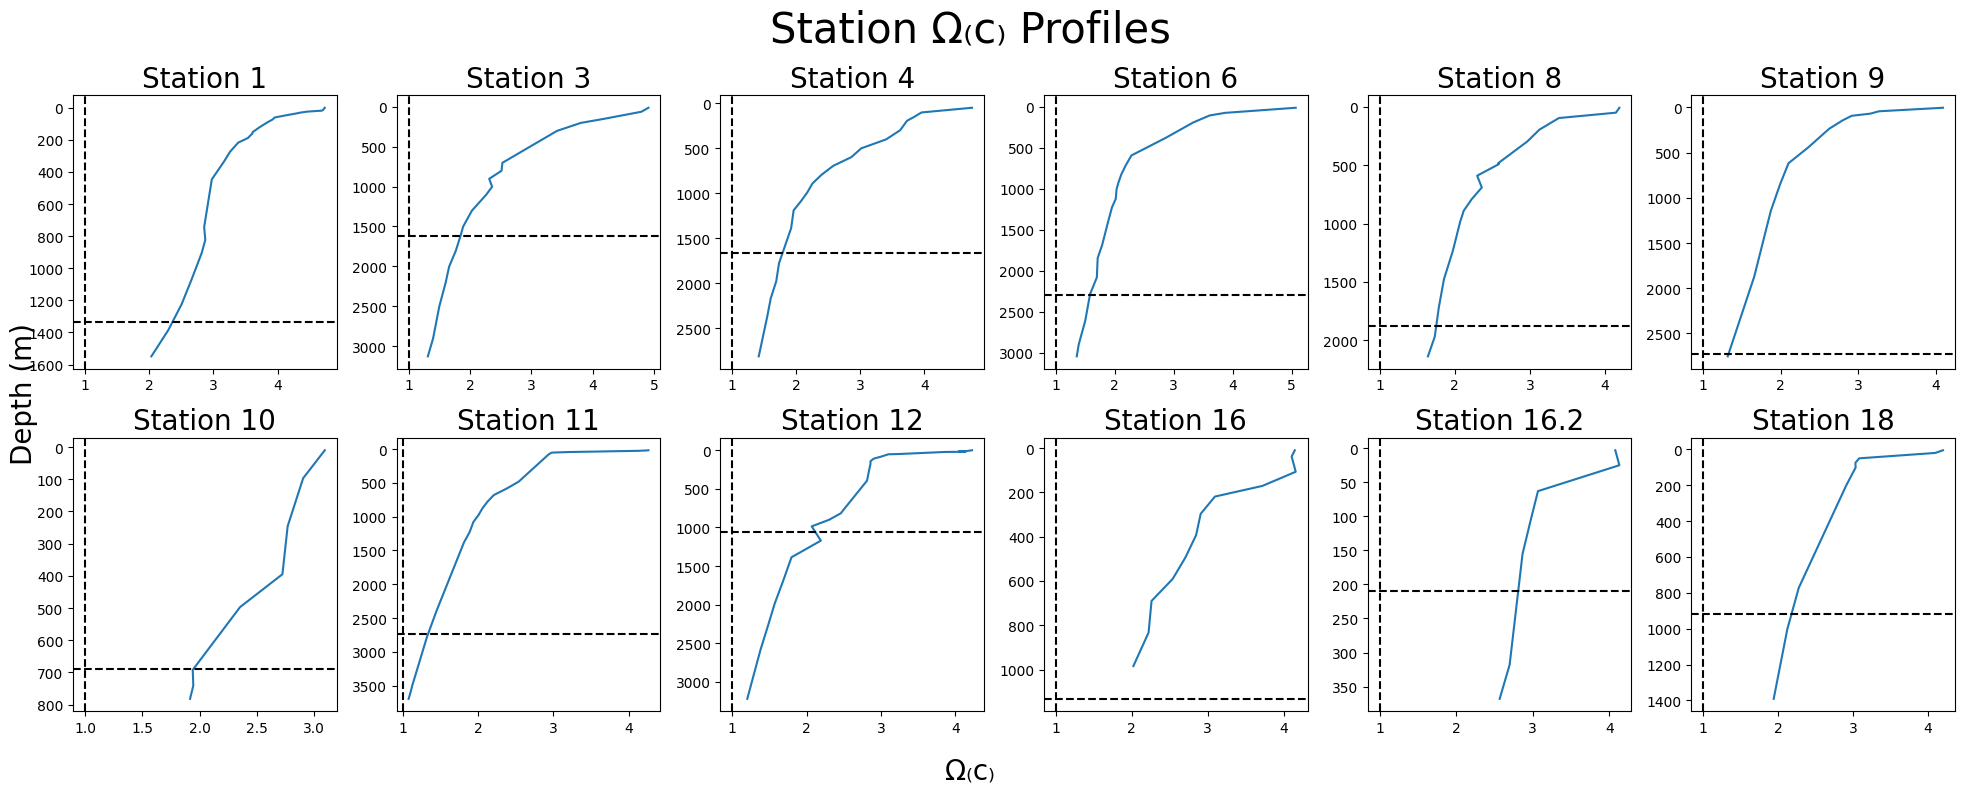

In [410]:

#graph: odv omega c vs depth 

fig,axes = plt.subplots(2,6, figsize=(20,8))

axes[0,0].plot(o1, zo1)

axes[0,1].plot(o3, zo3)

axes[0,2].plot(o4, zo4)

axes[0,3].plot(o6, zo6)

axes[0,4].plot(o8, zo8)

axes[0,5].plot(o9, zo9)

axes[1,0].plot(o10, zo10)

axes[1,1].plot(o11, zo11)

axes[1,2].plot(o12, zo12)

axes[1,3].plot(o16, zo16)

axes[1,4].plot(o16_2, zo16_2)

axes[1,5].plot(o18, zo18)

axes[0,0].invert_yaxis()
axes[0,1].invert_yaxis()
axes[0,2].invert_yaxis()
axes[0,3].invert_yaxis()
axes[0,4].invert_yaxis()
axes[0,5].invert_yaxis()
axes[1,0].invert_yaxis()
axes[1,1].invert_yaxis()
axes[1,2].invert_yaxis()
axes[1,3].invert_yaxis()
axes[1,4].invert_yaxis()
axes[1,5].invert_yaxis()

fig.supxlabel("\u03A9\u208Dc\u208E", fontsize =20)
fig.supylabel("Depth (m)", fontsize =20)
fig.suptitle('Station \u03A9\u208Dc\u208E Profiles', fontsize = 30)

axes[0,0].set_title("Station 1", fontsize =20)

axes[0,1].set_title("Station 3", fontsize =20)

axes[0,2].set_title("Station 4", fontsize =20)

axes[0,3].set_title("Station 6", fontsize =20)

axes[0,4].set_title("Station 8", fontsize =20)

axes[0,5].set_title("Station 9", fontsize =20)

axes[1,0].set_title("Station 10", fontsize =20)

axes[1,1].set_title("Station 11", fontsize =20)

axes[1,2].set_title("Station 12", fontsize =20)

axes[1,3].set_title("Station 16", fontsize =20)

axes[1,4].set_title("Station 16.2", fontsize =20)

axes[1,5].set_title("Station 18", fontsize =20)

axes[0,0].axhline(y=1333, color = 'Black', linestyle= '--')

axes[0,1].axhline(y=1616, color = 'Black', linestyle= '--')

axes[0,2].axhline(y=1664, color = 'Black', linestyle= '--')

axes[0,3].axhline(y=2296, color = 'Black', linestyle= '--')

axes[0,4].axhline(y=1877, color = 'Black', linestyle= '--')

axes[0,5].axhline(y=2730, color = 'Black', linestyle= '--')

axes[1,0].axhline(y=688, color = 'Black', linestyle= '--')

axes[1,1].axhline(y=2740, color = 'Black', linestyle= '--')

axes[1,2].axhline(y=1060, color = 'Black', linestyle= '--')

axes[1,3].axhline(y=1132, color = 'Black', linestyle= '--')

axes[1,4].axhline(y=209, color = 'Black', linestyle= '--')

axes[1,5].axhline(y=918, color = 'Black', linestyle= '--')

axes[0,0].axvline(x=1, color = 'Black', linestyle= '--')

axes[0,1].axvline(x=1, color = 'Black', linestyle= '--')

axes[0,2].axvline(x=1, color = 'Black', linestyle= '--')

axes[0,3].axvline(x=1, color = 'Black', linestyle= '--')

axes[0,4].axvline(x=1, color = 'Black', linestyle= '--')

axes[0,5].axvline(x=1, color = 'Black', linestyle= '--')

axes[1,0].axvline(x=1, color = 'Black', linestyle= '--')

axes[1,1].axvline(x=1, color = 'Black', linestyle= '--')

axes[1,2].axvline(x=1, color = 'Black', linestyle= '--')

axes[1,3].axvline(x=1, color = 'Black', linestyle= '--')

axes[1,4].axvline(x=1, color = 'Black', linestyle= '--')

axes[1,5].axvline(x=1, color = 'Black', linestyle= '--')


fig.tight_layout()

plt.show()

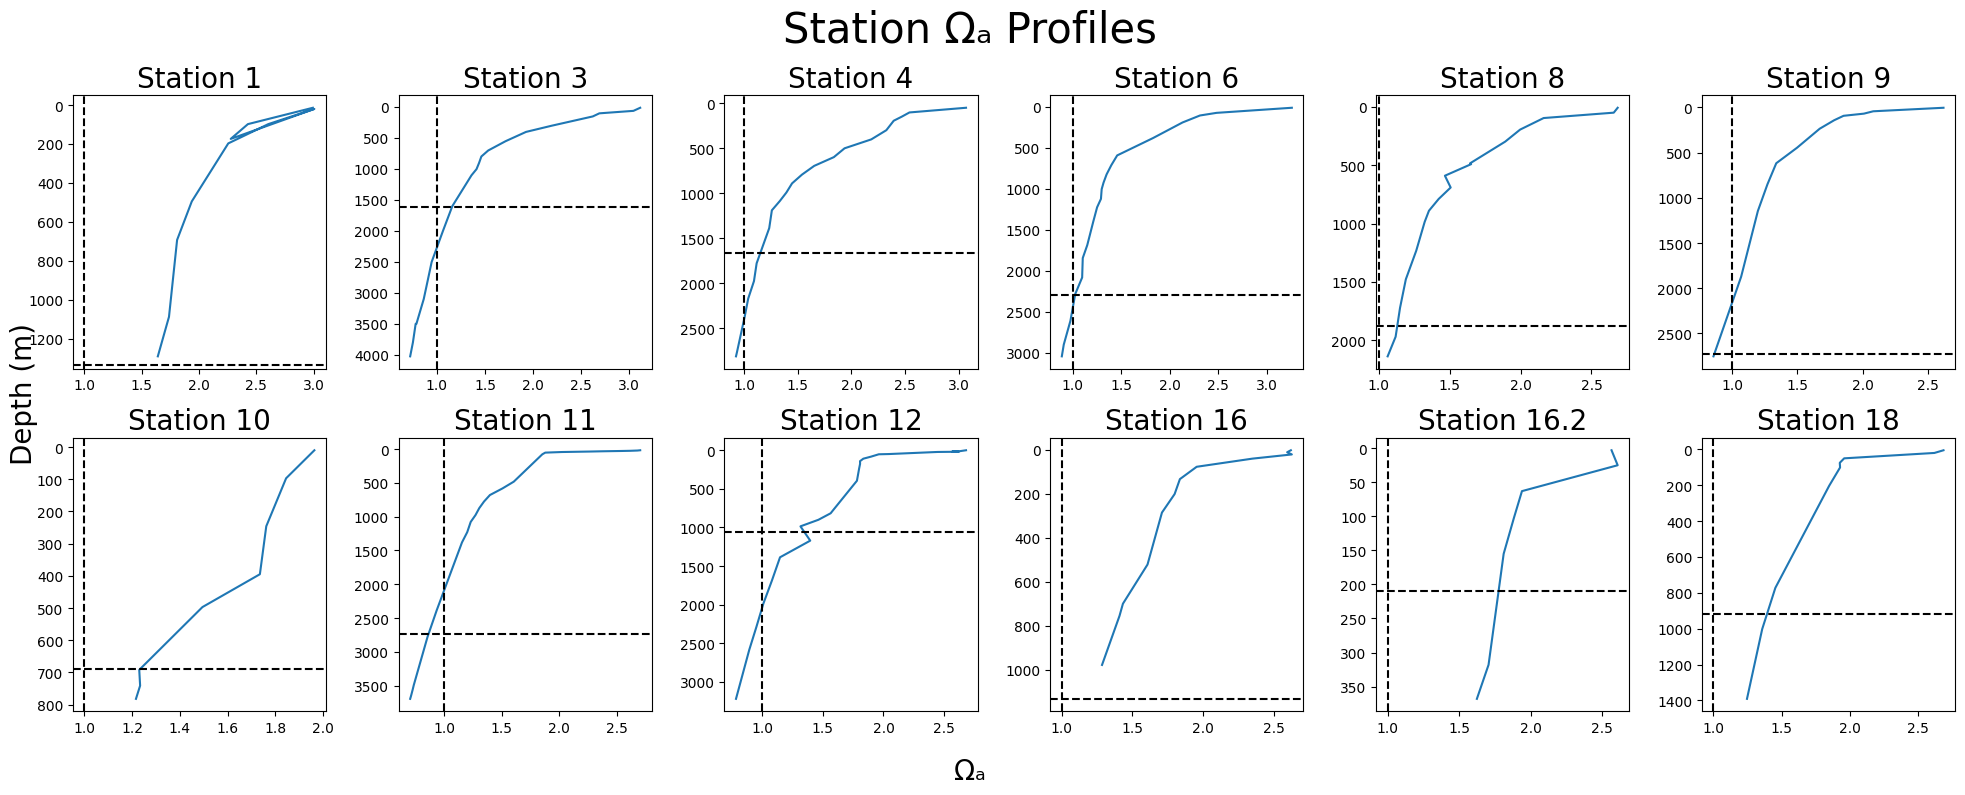

In [412]:


#graph: odv omega a vs depth 

fig,axes = plt.subplots(2,6, figsize=(20,8))

axes[0,0].plot(a1, za1)

axes[0,1].plot(a3, za3)

axes[0,2].plot(a4, za4)

axes[0,3].plot(a6, za6)

axes[0,4].plot(a8, za8)

axes[0,5].plot(a9, za9)

axes[1,0].plot(a10, za10)

axes[1,1].plot(a11, za11)

axes[1,2].plot(a12, za12)

axes[1,3].plot(a16, za16)

axes[1,4].plot(a16_2, za16_2)

axes[1,5].plot(a18, za18)

axes[0,0].invert_yaxis()
axes[0,1].invert_yaxis()
axes[0,2].invert_yaxis()
axes[0,3].invert_yaxis()
axes[0,4].invert_yaxis()
axes[0,5].invert_yaxis()
axes[1,0].invert_yaxis()
axes[1,1].invert_yaxis()
axes[1,2].invert_yaxis()
axes[1,3].invert_yaxis()
axes[1,4].invert_yaxis()
axes[1,5].invert_yaxis()

fig.supxlabel("\u03A9\u2090", fontsize =20)
fig.supylabel("Depth (m)", fontsize =20)
fig.suptitle('Station \u03A9\u2090 Profiles', fontsize = 30)

axes[0,0].set_title("Station 1", fontsize =20)

axes[0,1].set_title("Station 3", fontsize =20)

axes[0,2].set_title("Station 4", fontsize =20)

axes[0,3].set_title("Station 6", fontsize =20)

axes[0,4].set_title("Station 8", fontsize =20)

axes[0,5].set_title("Station 9", fontsize =20)

axes[1,0].set_title("Station 10", fontsize =20)

axes[1,1].set_title("Station 11", fontsize =20)

axes[1,2].set_title("Station 12", fontsize =20)

axes[1,3].set_title("Station 16", fontsize =20)

axes[1,4].set_title("Station 16.2", fontsize =20)

axes[1,5].set_title("Station 18", fontsize =20)

axes[0,0].axhline(y=1333, color = 'Black', linestyle= '--')

axes[0,1].axhline(y=1616, color = 'Black', linestyle= '--')

axes[0,2].axhline(y=1664, color = 'Black', linestyle= '--')

axes[0,3].axhline(y=2296, color = 'Black', linestyle= '--')

axes[0,4].axhline(y=1877, color = 'Black', linestyle= '--')

axes[0,5].axhline(y=2730, color = 'Black', linestyle= '--')

axes[1,0].axhline(y=688, color = 'Black', linestyle= '--')

axes[1,1].axhline(y=2740, color = 'Black', linestyle= '--')

axes[1,2].axhline(y=1060, color = 'Black', linestyle= '--')

axes[1,3].axhline(y=1132, color = 'Black', linestyle= '--')

axes[1,4].axhline(y=209, color = 'Black', linestyle= '--')

axes[1,5].axhline(y=918, color = 'Black', linestyle= '--')

axes[0,0].axvline(x=1, color = 'Black', linestyle= '--')

axes[0,1].axvline(x=1, color = 'Black', linestyle= '--')

axes[0,2].axvline(x=1, color = 'Black', linestyle= '--')

axes[0,3].axvline(x=1, color = 'Black', linestyle= '--')

axes[0,4].axvline(x=1, color = 'Black', linestyle= '--')

axes[0,5].axvline(x=1, color = 'Black', linestyle= '--')

axes[1,0].axvline(x=1, color = 'Black', linestyle= '--')

axes[1,1].axvline(x=1, color = 'Black', linestyle= '--')

axes[1,2].axvline(x=1, color = 'Black', linestyle= '--')

axes[1,3].axvline(x=1, color = 'Black', linestyle= '--')

axes[1,4].axvline(x=1, color = 'Black', linestyle= '--')

axes[1,5].axvline(x=1, color = 'Black', linestyle= '--')


fig.tight_layout()

plt.show()

Index(['station', 'depth ', 'Lat', 'Lon', 'LON', 'LONN', 'lon', 'lat',
       'depth .1', 'omega C at depth', 'omegac at surface', 'temp at surface',
       'temp at depth '],
      dtype='object')


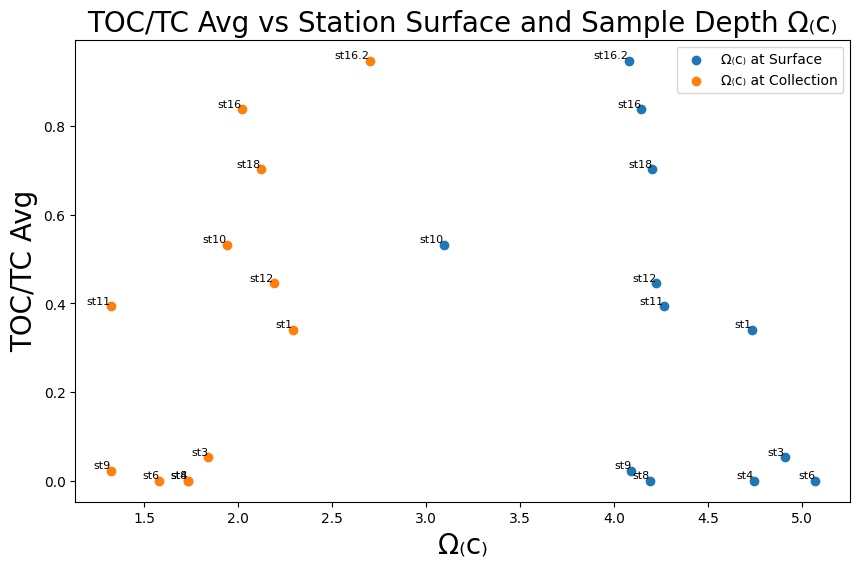

In [414]:

od = dp['omega C at depth']
os = dp['omegac at surface']



plt.figure (figsize = (10,6))
print(dp.columns)
ts = dp['temp at surface']
td = dp['temp at depth ']

plt.scatter(os, toc_tc_avg, label ='\u03A9\u208Dc\u208E at Surface')
plt.scatter(od, toc_tc_avg, label ='\u03A9\u208Dc\u208E at Collection')




plt.legend(loc = 'upper right') 
plt.xlabel("\u03A9\u208Dc\u208E", fontsize =20)
plt.ylabel("TOC/TC Avg", fontsize =20)
plt.title("TOC/TC Avg vs Station Surface and Sample Depth \u03A9\u208Dc\u208E", fontsize =20)

for x, y, label in zip(os, toc_tc_avg, s):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')
for x, y, label in zip(od, toc_tc_avg, s):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')


Index(['station', 'depth ', 'Lat', 'Lon', 'LON', 'LONN', 'lon', 'lat',
       'depth .1', 'omega C at depth', 'omegac at surface', 'temp at surface',
       'temp at depth '],
      dtype='object')


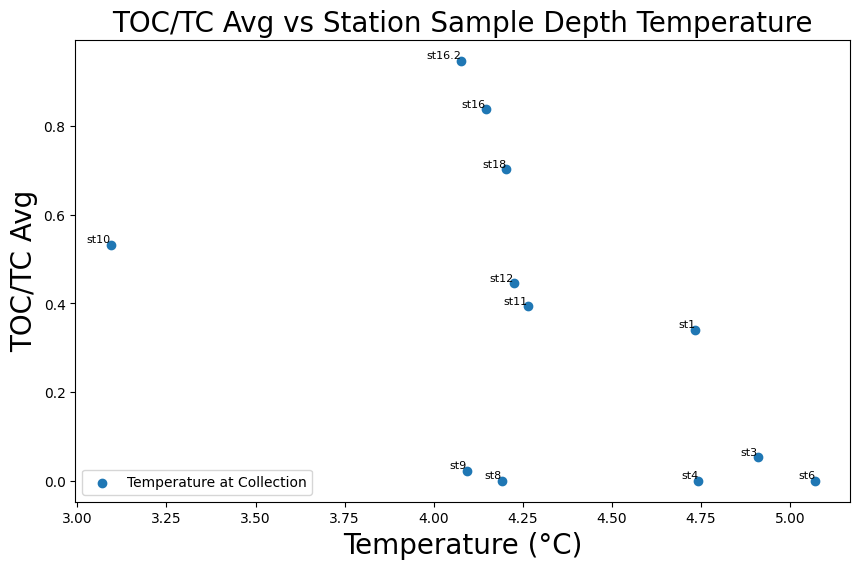

In [417]:


plt.figure (figsize = (10,6))
print(dp.columns)
ts = dp['temp at surface']
td = dp['temp at depth ']


plt.scatter(os, toc_tc_avg, label ='Temperature at Collection')




plt.legend(loc = 'lower left') 
plt.xlabel("Temperature (°C)", fontsize =20)
plt.ylabel("TOC/TC Avg", fontsize =20)
plt.title("TOC/TC Avg vs Station Sample Depth Temperature", fontsize =20)


for x, y, label in zip(os, toc_tc_avg, s):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')

plt.show()

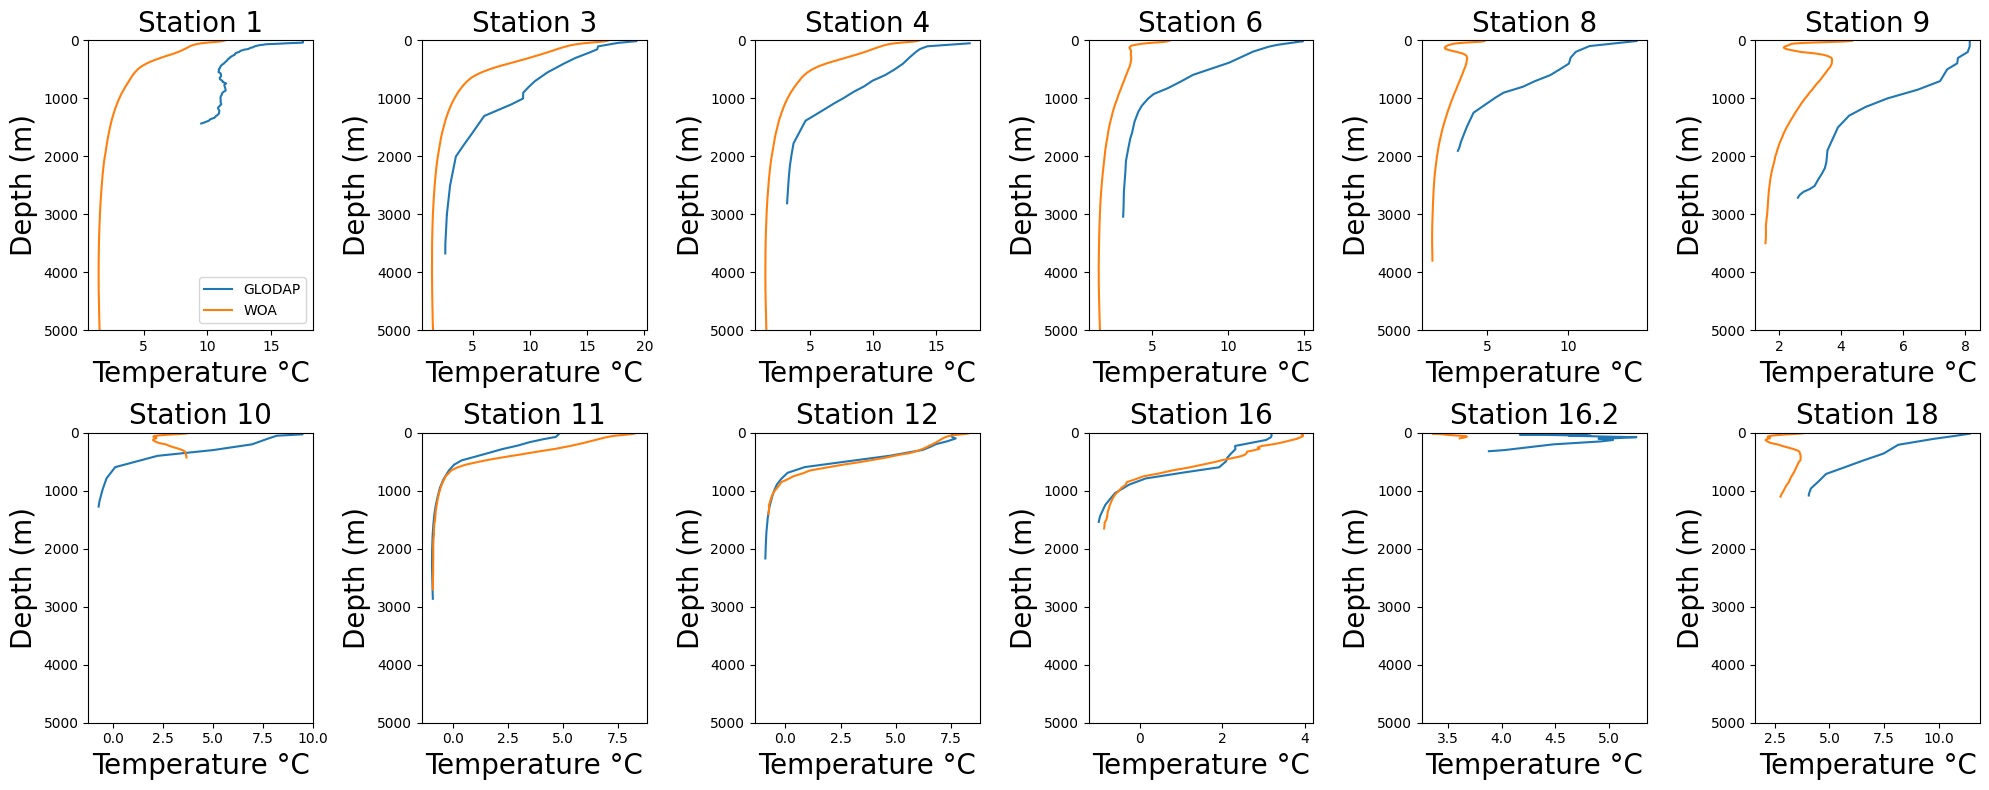

In [419]:
fig,axes = plt.subplots(2,6, figsize=(20,8))

axes[0,0].plot(tt1, zz1, label = 'GLODAP')

axes[0,1].plot(tt3, zz3, label = 'GLODAP')

axes[0,2].plot(tt4, zz4, label = 'GLODAP')

axes[0,3].plot(tt6, zz6, label = 'GLODAP')

axes[0,4].plot(tt8, zz8, label = 'GLODAP')

axes[0,5].plot(tt9, zz9, label = 'GLODAP')

axes[1,0].plot(tt10, zz10, label = 'GLODAP')

axes[1,1].plot(tt11, zz11, label = 'GLODAP')

axes[1,2].plot(tt12, zz12, label = 'GLODAP')

axes[1,3].plot(tt16, zz16, label = 'GLODAP')

axes[1,4].plot(tt16_2, zz16_2, label = 'GLODAP')

axes[1,5].plot(tt18, zz18, label = 'GLODAP')


axes[0,0].plot(t1, z1, label = 'WOA')

axes[0,1].plot(t3, z3, label = 'WOA')

axes[0,2].plot(t4, z4, label = 'WOA')

axes[0,3].plot(t6, z6, label = 'WOA')

axes[0,4].plot(t8, z8, label = 'WOA')

axes[0,5].plot(t9, z9, label = 'WOA')

axes[1,0].plot(t10, z10, label = 'WOA')

axes[1,1].plot(t11, z11, label = 'WOA')

axes[1,2].plot(t12, z12, label = 'WOA')

axes[1,3].plot(t16, z16, label = 'WOA')

axes[1,4].plot(t16_2, z16_2, label = 'WOA')

axes[1,5].plot(t18, z18, label = 'WOA')

axes[0,0].set_ylim(0,5000)
axes[0,1].set_ylim(0,5000)
axes[0,2].set_ylim(0,5000)
axes[0,3].set_ylim(0,5000)
axes[0,4].set_ylim(0,5000)
axes[0,5].set_ylim(0,5000)
axes[1,0].set_ylim(0,5000)
axes[1,1].set_ylim(0,5000)
axes[1,2].set_ylim(0,5000)
axes[1,3].set_ylim(0,5000)
axes[1,4].set_ylim(0,5000)
axes[1,5].set_ylim(0,5000)

axes[0,0].invert_yaxis()
axes[0,1].invert_yaxis()
axes[0,2].invert_yaxis()
axes[0,3].invert_yaxis()
axes[0,4].invert_yaxis()
axes[0,5].invert_yaxis()
axes[1,0].invert_yaxis()
axes[1,1].invert_yaxis()
axes[1,2].invert_yaxis()
axes[1,3].invert_yaxis()
axes[1,4].invert_yaxis()
axes[1,5].invert_yaxis()

axes[0,0].set_title("Station 1", fontsize =20)

axes[0,1].set_title("Station 3", fontsize =20)

axes[0,2].set_title("Station 4", fontsize =20)

axes[0,3].set_title("Station 6", fontsize =20)

axes[0,4].set_title("Station 8", fontsize =20)

axes[0,5].set_title("Station 9", fontsize =20)

axes[1,0].set_title("Station 10", fontsize =20)

axes[1,1].set_title("Station 11", fontsize =20)

axes[1,2].set_title("Station 12", fontsize =20)

axes[1,3].set_title("Station 16", fontsize =20)

axes[1,4].set_title("Station 16.2", fontsize =20)

axes[1,5].set_title("Station 18", fontsize =20)



axes[0,0].set_ylabel("Depth (m)", fontsize =20)

axes[0,1].set_ylabel("Depth (m)", fontsize =20)

axes[0,2].set_ylabel("Depth (m)", fontsize =20)

axes[0,3].set_ylabel("Depth (m)", fontsize =20)

axes[0,4].set_ylabel("Depth (m)", fontsize =20)

axes[0,5].set_ylabel("Depth (m)", fontsize =20)

axes[1,0].set_ylabel("Depth (m)", fontsize =20)

axes[1,1].set_ylabel("Depth (m)", fontsize =20)

axes[1,2].set_ylabel("Depth (m)", fontsize =20)

axes[1,3].set_ylabel("Depth (m)", fontsize =20)

axes[1,4].set_ylabel("Depth (m)", fontsize =20)

axes[1,5].set_ylabel("Depth (m)", fontsize =20)


axes[0,0].set_xlabel("Temperature °C", fontsize =20)

axes[0,1].set_xlabel("Temperature °C", fontsize =20)

axes[0,2].set_xlabel("Temperature °C", fontsize =20)

axes[0,3].set_xlabel("Temperature °C", fontsize =20)

axes[0,4].set_xlabel("Temperature °C", fontsize =20)

axes[0,5].set_xlabel("Temperature °C", fontsize =20)

axes[1,0].set_xlabel("Temperature °C", fontsize =20)

axes[1,1].set_xlabel("Temperature °C", fontsize =20)

axes[1,2].set_xlabel("Temperature °C", fontsize =20)

axes[1,3].set_xlabel("Temperature °C", fontsize =20)

axes[1,4].set_xlabel("Temperature °C", fontsize =20)

axes[1,5].set_xlabel("Temperature °C", fontsize =20)



axes[0,0].legend()

fig.tight_layout()


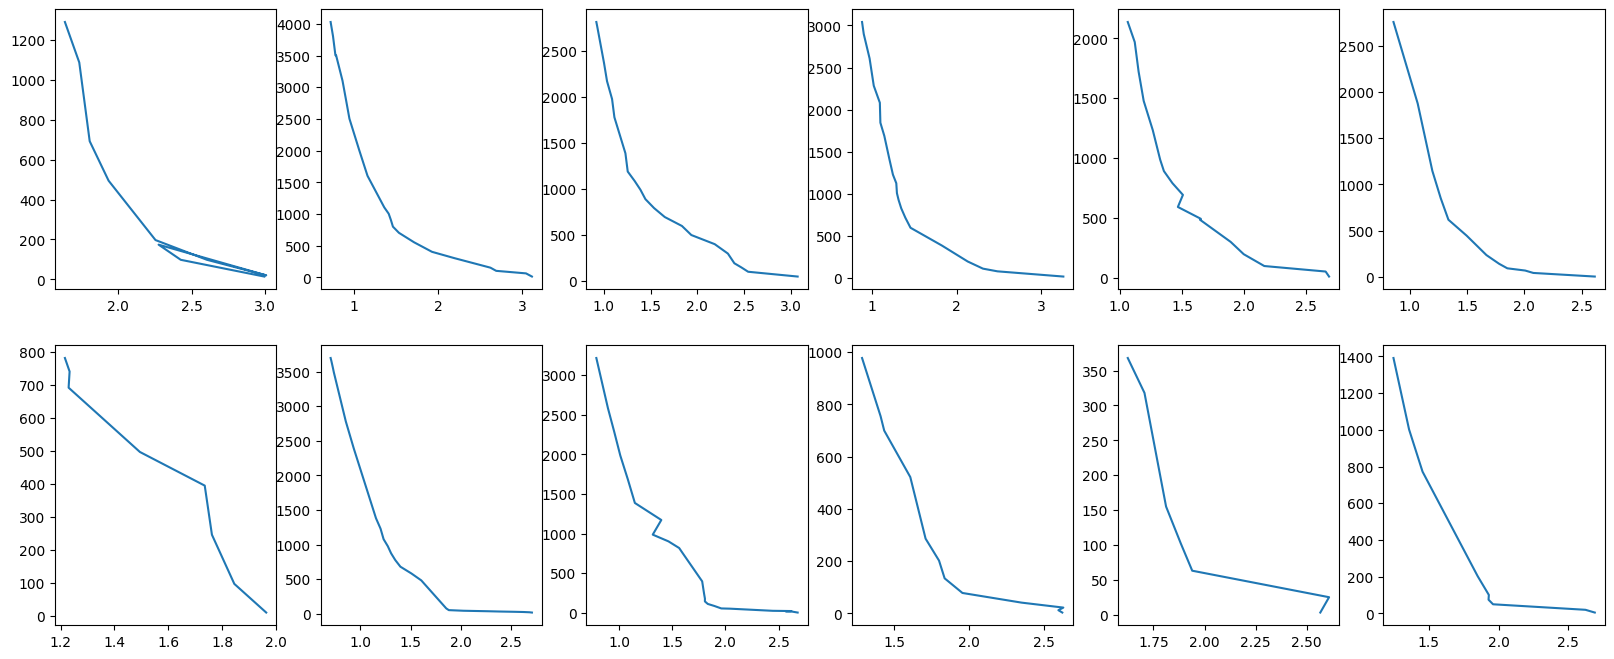

In [425]:
fig,axes = plt.subplots(2,6, figsize=(20,8))


axes[0,0].plot(a1, za1)

axes[0,1].plot(a3, za3)

axes[0,2].plot(a4, za4)

axes[0,3].plot(a6, za6)

axes[0,4].plot(a8, za8)

axes[0,5].plot(a9, za9)

axes[1,0].plot(a10, za10)

axes[1,1].plot(a11, za11)

axes[1,2].plot(a12, za12)

axes[1,3].plot(a16, za16)

axes[1,4].plot(a16_2, za16_2)

axes[1,5].plot(a18, za18)

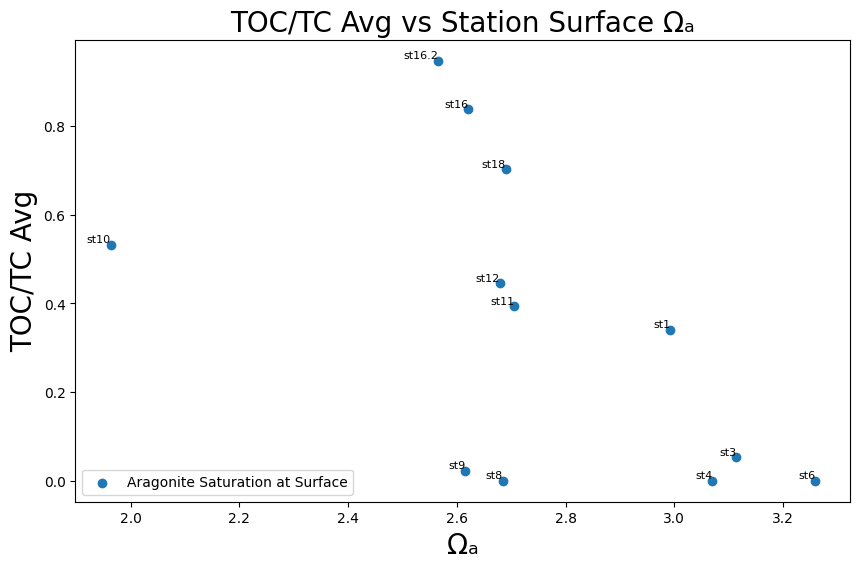

In [445]:
plt.figure (figsize = (10,6))
asurf = dp['omegaa at surface']


plt.scatter(asurf, toc_tc_avg, label ='\u03A9\u2090 at Surface')




plt.legend(loc = 'lower left') 
plt.xlabel("\u03A9\u2090", fontsize =20)
plt.ylabel("TOC/TC Avg", fontsize =20)
plt.title("TOC/TC Avg vs Station Surface \u03A9\u2090", fontsize =20)


for x, y, label in zip(asurf, toc_tc_avg, s):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')

plt.show()



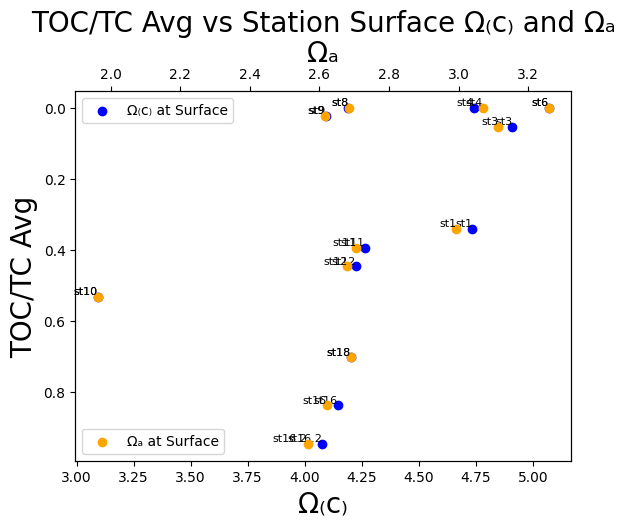

In [465]:
fig, ax1 = plt.subplots()
ax1.scatter(os, toc_tc_avg, color = 'blue', label = '\u03A9\u208Dc\u208E at Surface')
ax2 = ax1.twiny()
ax2.scatter(asurf, toc_tc_avg, color = 'orange', label = '\u03A9\u2090 at Surface')

fig.gca().invert_yaxis()


ax1.legend()
ax2.legend(loc = 'lower left')





ax2.set_xlabel('\u03A9\u2090', fontsize = 20)
ax1.set_xlabel("\u03A9\u208Dc\u208E", fontsize =20)
ax1.set_ylabel("TOC/TC Avg", fontsize =20)
ax1.set_title("TOC/TC Avg vs Station Surface \u03A9\u208Dc\u208E and \u03A9\u2090", fontsize =20)

for x, y, label in zip(os, toc_tc_avg, s):
    ax1.text(x, y, label, fontsize=8, ha='right', va='bottom')
for x, y, label in zip(asurf, toc_tc_avg, s):
    ax2.text(x, y, label, fontsize=8, ha='right', va='bottom')


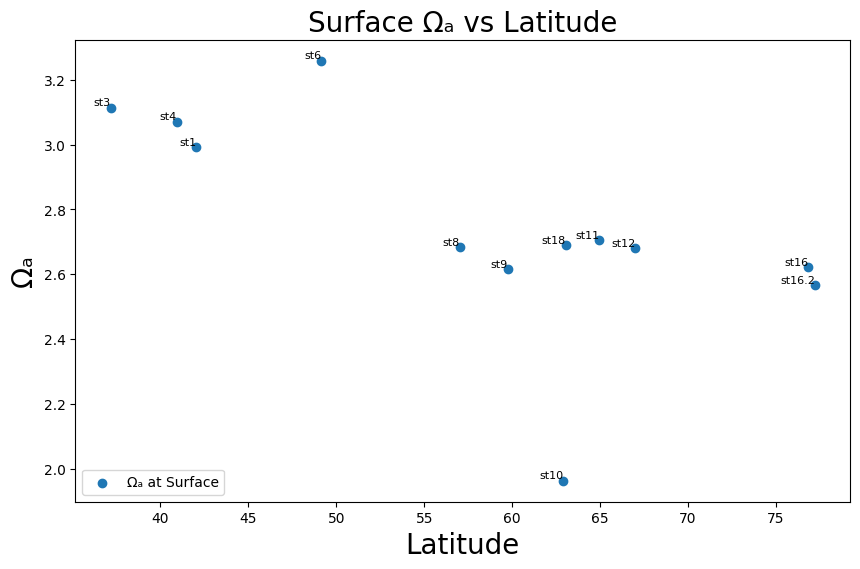

In [473]:
plt.figure (figsize = (10,6))
asurf = dp['omegaa at surface']


plt.scatter(lat, asurf, label ='\u03A9\u2090 at Surface')




plt.legend(loc = 'lower left') 
plt.ylabel("\u03A9\u2090", fontsize =20)
plt.xlabel("Latitude", fontsize =20)
plt.title("Surface \u03A9\u2090 vs Latitude", fontsize =20)


for x, y, label in zip(lat, asurf, s):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')

plt.show()



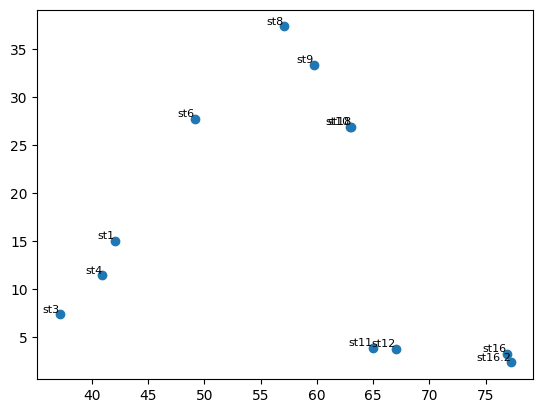

In [533]:
#yes trend with latitude

po4 = ps['po3 at surf']
so4 = ps['so4 at surf']

plt.scatter(lat, so4)

for x, y, label in zip(lat, so4, s):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')

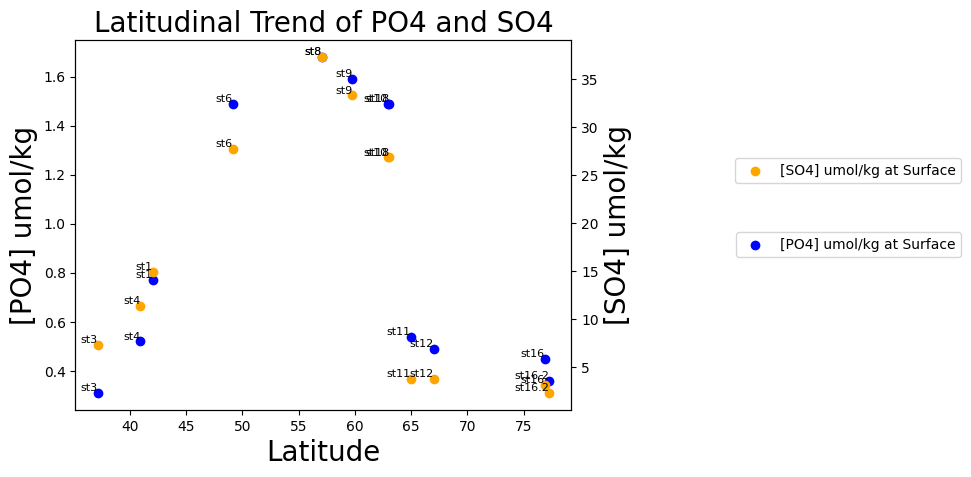

In [563]:
fig, ax1 = plt.subplots()
ax1.scatter(lat, po4, color = 'blue', label = '[PO4] umol/kg at Surface')
ax2 = ax1.twinx()
ax2.scatter(lat, so4, color = 'orange', label = '[SO4] umol/kg at Surface')




ax1.legend(bbox_to_anchor=(1.8, 0.5))
ax2.legend(bbox_to_anchor=(1.8, 0.7))





ax1.set_xlabel('Latitude', fontsize = 20)

ax1.set_ylabel("[PO4] umol/kg", fontsize =20)
ax2.set_ylabel("[SO4] umol/kg", fontsize =20)
ax1.set_title("Latitudinal Trend of PO4 and SO4", fontsize =20)

for x, y, label in zip(lat,po4, s):
    ax1.text(x, y, label, fontsize=8, ha='right', va='bottom')
for x, y, label in zip(lat, so4, s):
    ax2.text(x, y, label, fontsize=8, ha='right', va='bottom')


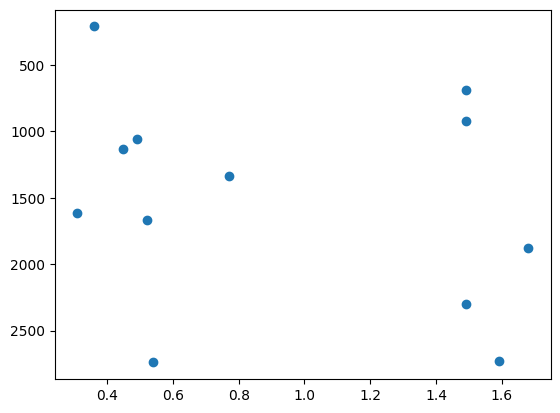

In [571]:
# no trend with depth
depth = dp['depth ']

plt.scatter(po4, depth)
plt.gca().invert_yaxis()

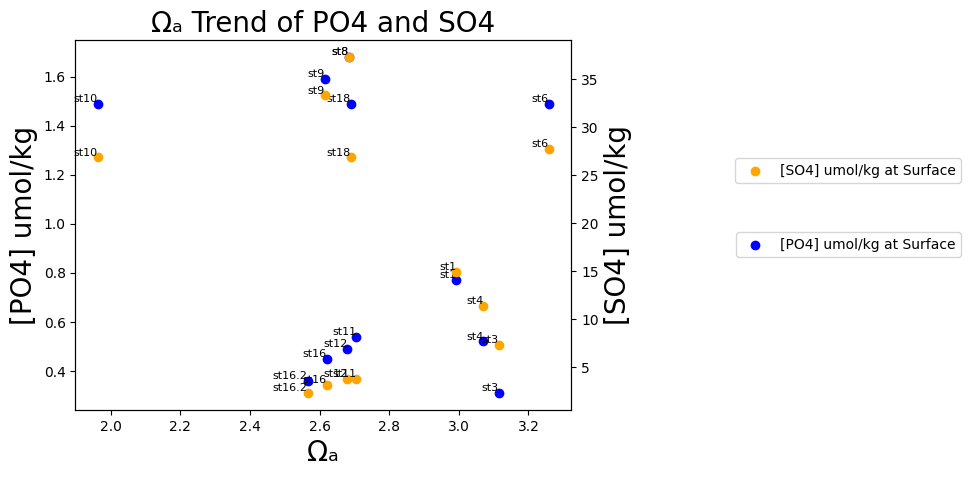

In [579]:
fig, ax1 = plt.subplots()
ax1.scatter(asurf, po4, color = 'blue', label = '[PO4] umol/kg at Surface')
ax2 = ax1.twinx()
ax2.scatter(asurf, so4, color = 'orange', label = '[SO4] umol/kg at Surface')




ax1.legend(bbox_to_anchor=(1.8, 0.5))
ax2.legend(bbox_to_anchor=(1.8, 0.7))





ax1.set_xlabel('\u03A9\u2090', fontsize = 20)

ax1.set_ylabel("[PO4] umol/kg", fontsize =20)
ax2.set_ylabel("[SO4] umol/kg", fontsize =20)
ax1.set_title("\u03A9\u2090 Trend of PO4 and SO4", fontsize =20)

for x, y, label in zip(asurf,po4, s):
    ax1.text(x, y, label, fontsize=8, ha='right', va='bottom')
for x, y, label in zip(asurf, so4, s):
    ax2.text(x, y, label, fontsize=8, ha='right', va='bottom')


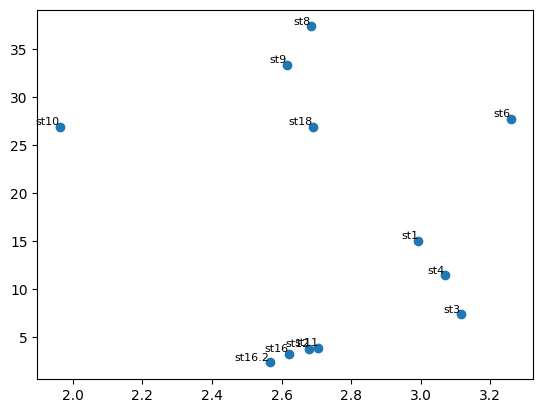

In [583]:

plt.scatter(asurf, so4)

for x, y, label in zip(asurf, so4, s):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')

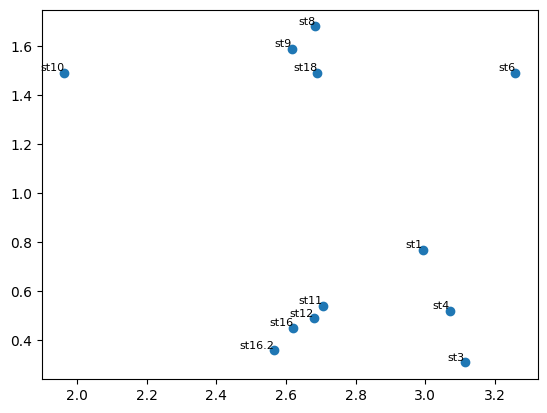

In [587]:
plt.scatter(asurf, po4)

for x, y, label in zip(asurf, po4, s):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')

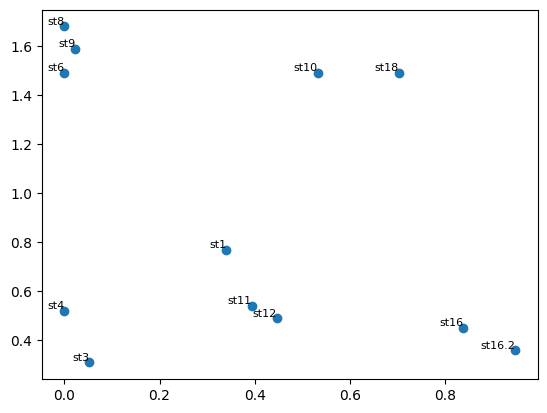

In [591]:
plt.scatter(toc_tc_avg, po4)

for x, y, label in zip(toc_tc_avg, po4, s):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')

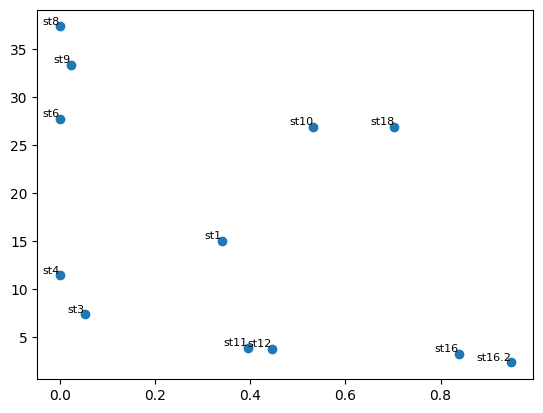

In [593]:
plt.scatter(toc_tc_avg, so4)

for x, y, label in zip(toc_tc_avg, so4, s):
    plt.text(x, y, label, fontsize=8, ha='right', va='bottom')